In [33]:
import json
import csv
import pandas as pd
import tqdm
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon
#from geopy.extra.rate_limiter import RateLimiter

In [34]:
with open('/home/samrose/Desktop/2019/food21_data/data-tools/mmfodata.geojson') as jsonfile:
    data = json.load(jsonfile)
data_file = open('mmfoodoutlets.csv', 'w')
header = ["name","address_1","zipcode","type long","lon","lat"]
csv_writer = csv.writer(data_file)
csv_writer.writerow(header)
a = {}
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
 'features': [{'type': 'Feature',
   'properties': {'fo_name': "American Joe's",
    'fo_address_1': '2105 Walnut St',
    'fo_address_2': '',
    'zip_code': '15132',
    'city': '',
    'state': '',
    'country': '',
    'pk': '359',
    'zip_percents': {},
    'type': [{'id': 3, 'name': 'CS', 'slug': 'cs'},
     {'id': 4,
      'name': 'Convenience stores, food marts or corner stores',
      'slug': 'convenience-stores-food-marts-or-corner-stores'}]},
   'geometry': {'type': 'Point',
    'coordinates': [-79.8529906525486, 40.33634833358315]}},
  {'type': 'Feature',
   'properties': {'fo_name': 'Clairton Mini Mart',
    'fo_address_1': '672 Miller Av',
    'fo_address_2': '',
    'zip_code': '15025',
    'city': '',
    'state': '',
    'country': '',
    'pk': '366',
    'zip_percents': {},
    'type': [{'id': 3, 'name': 'CS', 'slug': 'cs'},
     {'id': 4,
      'name': 'Convenience stores,

In [35]:
for d in data['features']:
    print(d)
    a = {}
    a['name'] = d['properties']['fo_name']
    a['address 1'] = d['properties']['fo_address_1']
    a['zipcode'] = d['properties']['zip_code']
    #print(d['properties']['type'])
    for b in d['properties']['type']:
        print(b)
        if len(b['name']) >= 4:
            if b['name'] is None:
                a['type long'] = 'null'
            else:
                a['type long'] = b['name']
    #print(d['geometry']['coordinates'])
    if d['geometry'] is None:
        pass
    else:
        a['lon'] = d['geometry']['coordinates'][0]
        a['lat'] = d['geometry']['coordinates'][-1]
    #print(sorted(a))
    csv_writer.writerow(a.values())
#data_file.close()

{'type': 'Feature', 'properties': {'fo_name': "American Joe's", 'fo_address_1': '2105 Walnut St', 'fo_address_2': '', 'zip_code': '15132', 'city': '', 'state': '', 'country': '', 'pk': '359', 'zip_percents': {}, 'type': [{'id': 3, 'name': 'CS', 'slug': 'cs'}, {'id': 4, 'name': 'Convenience stores, food marts or corner stores', 'slug': 'convenience-stores-food-marts-or-corner-stores'}]}, 'geometry': {'type': 'Point', 'coordinates': [-79.8529906525486, 40.33634833358315]}}
{'id': 3, 'name': 'CS', 'slug': 'cs'}
{'id': 4, 'name': 'Convenience stores, food marts or corner stores', 'slug': 'convenience-stores-food-marts-or-corner-stores'}
{'type': 'Feature', 'properties': {'fo_name': 'Clairton Mini Mart', 'fo_address_1': '672 Miller Av', 'fo_address_2': '', 'zip_code': '15025', 'city': '', 'state': '', 'country': '', 'pk': '366', 'zip_percents': {}, 'type': [{'id': 3, 'name': 'CS', 'slug': 'cs'}, {'id': 4, 'name': 'Convenience stores, food marts or corner stores', 'slug': 'convenience-stores

In [36]:
import pandas as pd


rest = pd.read_csv('/home/samrose/Downloads/allegheny_fastfood_restaurants.csv')

only_rest = rest[rest['description'].isin(['Restaurant with Liquor','Chain Restaurant without Liquor','Restaurant without Liquor'])]


only_rest




#df = pd.read_csv('mmfoodoutlets.csv')
#chains = only_rest[only_rest['description'].isin(['Chain Restaurant without Liquor'])]
#chain = chains.copy()

,description,y,x
1,Restaurant with Liquor,40.355927,-80.135182
2,Chain Restaurant without Liquor,40.348882,-80.014728
3,Restaurant without Liquor,40.359431,-80.109894
4,Restaurant with Liquor,40.402244,-80.091796
5,Restaurant with Liquor,40.429404,-79.982500
...,...,...,...
9993,Chain Restaurant without Liquor,40.441355,-79.994853
9995,Chain Restaurant without Liquor,40.439449,-79.765790
9996,Restaurant without Liquor,40.495640,-80.056179
9997,Chain Restaurant without Liquor,40.388126,-79.822787


In [37]:
#geocoder = Nominatim(user_agent="fai")

In [38]:
#location = geocoder.reverse("40.428354, -79.977423")
#location.raw

In [39]:
restaurants = only_rest.copy()
restaurants

,description,y,x
1,Restaurant with Liquor,40.355927,-80.135182
2,Chain Restaurant without Liquor,40.348882,-80.014728
3,Restaurant without Liquor,40.359431,-80.109894
4,Restaurant with Liquor,40.402244,-80.091796
5,Restaurant with Liquor,40.429404,-79.982500
...,...,...,...
9993,Chain Restaurant without Liquor,40.441355,-79.994853
9995,Chain Restaurant without Liquor,40.439449,-79.765790
9996,Restaurant without Liquor,40.495640,-80.056179
9997,Chain Restaurant without Liquor,40.388126,-79.822787


In [40]:
#restaurants["zipcode"] = restaurants.apply(lambda x:geocoder.reverse(str(x["y"])+", "+str(x["x"])).address.split(",")[-2], axis=1)

In [41]:
restaurants.to_csv('restmm.csv')

In [42]:
z_15045 = Polygon([[-79.884636, 40.3447], [-79.884581, 40.344673], [-79.884418, 40.344595], [-79.884364, 40.344569], [-79.88432, 40.344548], [-79.884297, 40.344537], [-79.884187, 40.344494], [-79.884172, 40.344489], [-79.884144, 40.344475], [-79.88405, 40.344421], [-79.883773, 40.344302], [-79.883559, 40.344203], [-79.881999, 40.343478], [-79.881796, 40.343386], [-79.880967, 40.341802], [-79.881271, 40.341569], [-79.881407, 40.341406], [-79.882432, 40.34063], [-79.883048, 40.340025], [-79.883289, 40.339811], [-79.883408, 40.339542], [-79.883482, 40.339539], [-79.883526, 40.339449], [-79.884516, 40.33738], [-79.884681, 40.337034], [-79.884714, 40.336966], [-79.883996, 40.336452], [-79.883582, 40.336157], [-79.883537, 40.336125], [-79.883676, 40.335876], [-79.883904, 40.335464], [-79.883725, 40.334755], [-79.88352, 40.33393], [-79.883406, 40.333465], [-79.883259, 40.33287], [-79.883244, 40.332808], [-79.88323, 40.33275], [-79.883121, 40.332447], [-79.883106, 40.3324], [-79.882713, 40.332221], [-79.881214, 40.331537], [-79.881111, 40.331491], [-79.88102, 40.331452], [-79.879522, 40.330815], [-79.876781, 40.329646], [-79.876278, 40.329432], [-79.875434, 40.329078], [-79.875414, 40.329063], [-79.875402, 40.329054], [-79.875102, 40.328764], [-79.875076, 40.328734], [-79.87503, 40.328694], [-79.874597, 40.328301], [-79.874497, 40.328211], [-79.874263, 40.327991], [-79.874238, 40.327959], [-79.873135, 40.327071], [-79.87231, 40.326443], [-79.874345, 40.323601], [-79.874416, 40.323497], [-79.874645, 40.323192], [-79.8747, 40.323121], [-79.874736, 40.323072], [-79.874901, 40.322852], [-79.874974, 40.322756], [-79.875087, 40.322606], [-79.875136, 40.32254], [-79.875546, 40.321996], [-79.875815, 40.321638], [-79.875892, 40.321532], [-79.87599, 40.3214], [-79.876294, 40.320995], [-79.876173, 40.320951], [-79.875846, 40.320835], [-79.87411, 40.320211], [-79.874326, 40.319999], [-79.874442, 40.319875], [-79.874514, 40.319712], [-79.874682, 40.319331], [-79.874693, 40.319076], [-79.874929, 40.31851], [-79.875245, 40.317859], [-79.874683, 40.317126], [-79.875022, 40.316952], [-79.876219, 40.316334], [-79.875824, 40.315453], [-79.876176, 40.314647], [-79.876823, 40.314037], [-79.877357, 40.313548], [-79.877823, 40.313095], [-79.879762, 40.31411], [-79.881828, 40.314958], [-79.882542, 40.313957], [-79.882577, 40.313909], [-79.882638, 40.313827], [-79.882793, 40.313597], [-79.882834, 40.313535], [-79.882964, 40.313344], [-79.883396, 40.312673], [-79.883542, 40.312447], [-79.883606, 40.312349], [-79.884113, 40.31155], [-79.884144, 40.311503], [-79.884482, 40.311638], [-79.884626, 40.311709], [-79.885638, 40.3121], [-79.886891, 40.312685], [-79.887235, 40.312837], [-79.887652, 40.313022], [-79.889048, 40.313642], [-79.890105, 40.314124], [-79.89139, 40.314728], [-79.892237, 40.315397], [-79.892826, 40.315919], [-79.893004, 40.316073], [-79.893317, 40.316345], [-79.893476, 40.31648], [-79.894051, 40.316969], [-79.895009, 40.317783], [-79.895638, 40.318469], [-79.896003, 40.318867], [-79.896675, 40.319746], [-79.896923, 40.320154], [-79.897068, 40.320392], [-79.897279, 40.320782], [-79.897402, 40.321015], [-79.897432, 40.321127], [-79.897538, 40.321525], [-79.897559, 40.322008], [-79.897558, 40.323401], [-79.897495, 40.324271], [-79.897465, 40.324433], [-79.897367, 40.32495], [-79.897214, 40.32576], [-79.897084, 40.327005], [-79.897027, 40.327349], [-79.896921, 40.327989], [-79.896799, 40.328799], [-79.896649, 40.329592], [-79.896489, 40.330435], [-79.896376, 40.330889], [-79.896294, 40.330882], [-79.896364, 40.33093], [-79.896169, 40.331639], [-79.895813, 40.332782], [-79.895431, 40.333741], [-79.894975, 40.334628], [-79.894867, 40.334778], [-79.894058, 40.336118], [-79.893851, 40.33646], [-79.8927, 40.337958], [-79.891884, 40.33899], [-79.891133, 40.339679], [-79.891036, 40.339768], [-79.890879, 40.339912], [-79.890195, 40.34048], [-79.889778, 40.340804], [-79.889462, 40.341049], [-79.888859, 40.341594], [-79.888708, 40.34173], [-79.888606, 40.341833], [-79.888064, 40.342383], [-79.887855, 40.342611], [-79.887558, 40.342936], [-79.887266, 40.343256], [-79.886356, 40.344175], [-79.885612, 40.345168], [-79.885499, 40.345114], [-79.884851, 40.344803], [-79.884636, 40.3447]]
) 

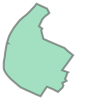

In [43]:
z_15045

In [44]:
z_15034 = Polygon([[-79.885107, 40.357913], [-79.885058, 40.357826], [-79.884817, 40.357396], [-79.883882, 40.357489], [-79.88323, 40.357553], [-79.883114, 40.357573], [-79.882979, 40.357565], [-79.881981, 40.357569], [-79.88139, 40.357569], [-79.881367, 40.357571], [-79.881299, 40.357415], [-79.881227, 40.357251], [-79.8812, 40.357189], [-79.880981, 40.357234], [-79.880319, 40.357361], [-79.878931, 40.357494], [-79.878404, 40.35756], [-79.877824, 40.357632], [-79.87738, 40.357689], [-79.87724, 40.357706], [-79.877238, 40.357689], [-79.877221, 40.357586], [-79.877189, 40.357392], [-79.876995, 40.356203], [-79.876945, 40.355921], [-79.87694, 40.355891], [-79.876872, 40.355493], [-79.876821, 40.355195], [-79.876676, 40.354337], [-79.876978, 40.354203], [-79.877599, 40.353969], [-79.878293, 40.353641], [-79.878885, 40.353223], [-79.879572, 40.352747], [-79.880256, 40.352178], [-79.880846, 40.351649], [-79.881408, 40.351046], [-79.881681, 40.350642], [-79.881828, 40.350426], [-79.882024, 40.35009], [-79.882333, 40.349564], [-79.882845, 40.348869], [-79.883611, 40.347855], [-79.884959, 40.346041], [-79.884915, 40.346052], [-79.885073, 40.345888], [-79.885612, 40.345168], [-79.886356, 40.344175], [-79.887266, 40.343256], [-79.887558, 40.342936], [-79.887855, 40.342611], [-79.888064, 40.342383], [-79.888606, 40.341833], [-79.888708, 40.34173], [-79.888859, 40.341594], [-79.889462, 40.341049], [-79.889778, 40.340804], [-79.890195, 40.34048], [-79.890879, 40.339912], [-79.891036, 40.339768], [-79.891133, 40.339679], [-79.891884, 40.33899], [-79.892066, 40.339081], [-79.892492, 40.339295], [-79.892784, 40.339442], [-79.892849, 40.339474], [-79.893858, 40.339983], [-79.89381, 40.340072], [-79.893736, 40.340206], [-79.893515, 40.340611], [-79.89349, 40.340658], [-79.893437, 40.340744], [-79.893469, 40.340751], [-79.893565, 40.340775], [-79.893598, 40.340783], [-79.893637, 40.340793], [-79.894154, 40.340904], [-79.894544, 40.340988], [-79.895448, 40.341184], [-79.895634, 40.341251], [-79.895796, 40.341345], [-79.895799, 40.341347], [-79.895911, 40.341451], [-79.896093, 40.341714], [-79.89615, 40.341775], [-79.896158, 40.341781], [-79.896222, 40.341829], [-79.896232, 40.341835], [-79.896207, 40.341919], [-79.895918, 40.342786], [-79.895473, 40.344125], [-79.895476, 40.344127], [-79.895448, 40.344199], [-79.895419, 40.344281], [-79.895324, 40.344546], [-79.89603, 40.345012], [-79.896892, 40.345626], [-79.89699, 40.345696], [-79.897218, 40.346086], [-79.897294, 40.346216], [-79.897288, 40.346241], [-79.89727, 40.346301], [-79.897412, 40.346397], [-79.897529, 40.346484], [-79.898356, 40.347039], [-79.902383, 40.349803], [-79.904384, 40.351177], [-79.904825, 40.35148], [-79.906201, 40.352425], [-79.906232, 40.352448], [-79.906173, 40.352457], [-79.905953, 40.35249], [-79.905707, 40.352501], [-79.905667, 40.3525], [-79.905492, 40.35248], [-79.905375, 40.352467], [-79.90512, 40.352418], [-79.904225, 40.352248], [-79.903965, 40.352229], [-79.903742, 40.352236], [-79.903502, 40.352269], [-79.903216, 40.35233], [-79.902519, 40.352496], [-79.902299, 40.352572], [-79.902231, 40.352606], [-79.902055, 40.352733], [-79.902046, 40.352741], [-79.902031, 40.352757], [-79.901912, 40.352917], [-79.901631, 40.353441], [-79.901507, 40.353652], [-79.901382, 40.353841], [-79.901141, 40.354172], [-79.901139, 40.354173], [-79.900637, 40.354824], [-79.900397, 40.355155], [-79.900042, 40.355625], [-79.899984, 40.355701], [-79.899955, 40.355741], [-79.899881, 40.355819], [-79.899772, 40.355894], [-79.899463, 40.356057], [-79.899214, 40.356046], [-79.899064, 40.35604], [-79.898619, 40.356031], [-79.898466, 40.356025], [-79.898218, 40.356016], [-79.898031, 40.35612], [-79.897885, 40.356173], [-79.897574, 40.356288], [-79.897388, 40.356352], [-79.896837, 40.356522], [-79.896819, 40.356528], [-79.896483, 40.356624], [-79.896281, 40.356681], [-79.896097, 40.356751], [-79.895983, 40.356795], [-79.895641, 40.356968], [-79.895272, 40.357158], [-79.895155, 40.357215], [-79.895007, 40.357296], [-79.894844, 40.357387], [-79.89465, 40.357491], [-79.894609, 40.35751], [-79.89457, 40.35753], [-79.894485, 40.357565], [-79.894444, 40.357583], [-79.894362, 40.357617], [-79.894293, 40.357633], [-79.894258, 40.357641], [-79.894081, 40.35767], [-79.893937, 40.357684], [-79.893012, 40.357727], [-79.892487, 40.357757], [-79.892283, 40.357779], [-79.892246, 40.357784], [-79.892009, 40.357826], [-79.891777, 40.357883], [-79.89115, 40.358084], [-79.889678, 40.358565], [-79.889313, 40.35868], [-79.889025, 40.358777], [-79.888454, 40.358947], [-79.888068, 40.359051], [-79.887677, 40.359143], [-79.887283, 40.359226], [-79.887084, 40.359261], [-79.886882, 40.359277], [-79.886678, 40.359288], [-79.886065, 40.359287], [-79.885969, 40.359292], [-79.885887, 40.359296], [-79.885765, 40.359095], [-79.885441, 40.358509], [-79.885107, 40.357913]]
)

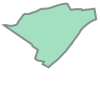

In [45]:
z_15034

In [46]:
z_15132 = Polygon([[-79.866141, 40.35604], [-79.865833, 40.356071], [-79.864723, 40.356179], [-79.864494, 40.356202], [-79.864102, 40.356241], [-79.863389, 40.356311], [-79.860618, 40.356414], [-79.858622, 40.356416], [-79.857642, 40.356416], [-79.857473, 40.356415], [-79.855864, 40.356405], [-79.855544, 40.356404], [-79.854047, 40.356431], [-79.853111, 40.356448], [-79.851129, 40.356561], [-79.850476, 40.356599], [-79.848289, 40.356875], [-79.847944, 40.356932], [-79.847653, 40.35698], [-79.847397, 40.357022], [-79.847217, 40.357052], [-79.846921, 40.357101], [-79.84637, 40.357191], [-79.846151, 40.357241], [-79.844622, 40.357585], [-79.84408, 40.35774], [-79.843731, 40.357841], [-79.843281, 40.357971], [-79.842478, 40.358372], [-79.841884, 40.358669], [-79.841117, 40.359046], [-79.839085, 40.360158], [-79.837964, 40.361031], [-79.837386, 40.361621], [-79.836966, 40.362152], [-79.836463, 40.363522], [-79.836169, 40.364992], [-79.835145, 40.362984], [-79.835045, 40.362821], [-79.834936, 40.36265], [-79.834475, 40.361927], [-79.834437, 40.361867], [-79.834318, 40.361674], [-79.834186, 40.361458], [-79.834129, 40.361442], [-79.833783, 40.361342], [-79.833571, 40.361635], [-79.833505, 40.361732], [-79.83348, 40.361767], [-79.833404, 40.361857], [-79.833424, 40.362092], [-79.833434, 40.362215], [-79.833269, 40.362483], [-79.833204, 40.362674], [-79.832894, 40.362557], [-79.832844, 40.362514], [-79.832812, 40.362484], [-79.832262, 40.362262], [-79.832059, 40.362172], [-79.832065, 40.362197], [-79.832072, 40.362229], [-79.832086, 40.362283], [-79.832092, 40.362327], [-79.832098, 40.36236], [-79.832114, 40.362466], [-79.832117, 40.362491], [-79.832136, 40.362651], [-79.832139, 40.362888], [-79.832141, 40.362989], [-79.832129, 40.363006], [-79.832118, 40.36301], [-79.832064, 40.36303], [-79.832026, 40.363035], [-79.83173, 40.363035], [-79.831486, 40.363047], [-79.831255, 40.363051], [-79.831253, 40.363068], [-79.830819, 40.363074], [-79.830816, 40.362953], [-79.830813, 40.362567], [-79.830741, 40.362176], [-79.830587, 40.362189], [-79.830473, 40.3622], [-79.830103, 40.362263], [-79.829853, 40.362047], [-79.827928, 40.362192], [-79.827339, 40.362501], [-79.827104, 40.36263], [-79.827063, 40.362641], [-79.827019, 40.36264], [-79.826978, 40.362631], [-79.826955, 40.362616], [-79.826887, 40.362542], [-79.826583, 40.362127], [-79.826515, 40.362056], [-79.826611, 40.361989], [-79.826927, 40.361795], [-79.827255, 40.361614], [-79.827328, 40.36158], [-79.827454, 40.361524], [-79.827606, 40.361455], [-79.828063, 40.361207], [-79.82817, 40.36115], [-79.829052, 40.361193], [-79.829103, 40.361202], [-79.82918, 40.361184], [-79.829245, 40.361153], [-79.82994, 40.360682], [-79.830158, 40.360533], [-79.830814, 40.360089], [-79.830975, 40.359981], [-79.831039, 40.359953], [-79.83098, 40.359865], [-79.830976, 40.359858], [-79.830844, 40.359659], [-79.830803, 40.359604], [-79.830742, 40.359519], [-79.830982, 40.35929], [-79.830997, 40.359277], [-79.831226, 40.359028], [-79.831435, 40.358758], [-79.831612, 40.35852], [-79.831811, 40.358255], [-79.831243, 40.357966], [-79.831197, 40.357938], [-79.831145, 40.357916], [-79.830892, 40.357788], [-79.830696, 40.357694], [-79.830492, 40.357612], [-79.830178, 40.357505], [-79.82889, 40.357108], [-79.828673, 40.357046], [-79.828451, 40.357001], [-79.828, 40.356927], [-79.827964, 40.356917], [-79.827758, 40.356841], [-79.827375, 40.356646], [-79.827187, 40.356543], [-79.82664, 40.356216], [-79.826504, 40.356125], [-79.826468, 40.356094], [-79.826424, 40.35607], [-79.826337, 40.35602], [-79.825941, 40.355748], [-79.825746, 40.355625], [-79.824778, 40.354973], [-79.824474, 40.354769], [-79.824252, 40.354621], [-79.823554, 40.354172], [-79.823247, 40.353975], [-79.823348, 40.353935], [-79.823619, 40.35383], [-79.823656, 40.353823], [-79.823764, 40.353806], [-79.823889, 40.353881], [-79.824046, 40.353975], [-79.824268, 40.354101], [-79.824284, 40.35411], [-79.824398, 40.354168], [-79.824538, 40.354013], [-79.824766, 40.353763], [-79.824961, 40.353548], [-79.825102, 40.353394], [-79.825228, 40.353254], [-79.825418, 40.353047], [-79.825459, 40.353001], [-79.825609, 40.352837], [-79.825736, 40.352698], [-79.825864, 40.352558], [-79.826052, 40.352356], [-79.826053, 40.352356], [-79.82625, 40.35214], [-79.82632, 40.352065], [-79.826386, 40.352009], [-79.826441, 40.35199], [-79.826456, 40.351985], [-79.826606, 40.351937], [-79.826662, 40.351919], [-79.826945, 40.351911], [-79.827796, 40.35189], [-79.82808, 40.351883], [-79.82842, 40.351824], [-79.829295, 40.351676], [-79.829424, 40.351597], [-79.82972, 40.351419], [-79.829809, 40.351372], [-79.829836, 40.35126], [-79.829872, 40.351239], [-79.829936, 40.351186], [-79.829957, 40.351159], [-79.829962, 40.35115], [-79.830013, 40.351071], [-79.830067, 40.350986], [-79.830121, 40.350763], [-79.83014, 40.35057], [-79.83014, 40.350565], [-79.830163, 40.349983], [-79.83018, 40.349783], [-79.830197, 40.349593], [-79.830232, 40.349401], [-79.830285, 40.34921], [-79.830352, 40.349022], [-79.830359, 40.349003], [-79.83057, 40.348518], [-79.830596, 40.348456], [-79.830647, 40.348339], [-79.830681, 40.348273], [-79.830712, 40.348214], [-79.830749, 40.348142], [-79.830772, 40.348101], [-79.830794, 40.348072], [-79.830911, 40.347966], [-79.830971, 40.347913], [-79.830858, 40.347759], [-79.830521, 40.347299], [-79.830409, 40.347146], [-79.829184, 40.345393], [-79.828827, 40.344963], [-79.828611, 40.344703], [-79.8283, 40.344724], [-79.826565, 40.3448], [-79.826522, 40.344801], [-79.826324, 40.344807], [-79.825348, 40.344834], [-79.824572, 40.344854], [-79.822596, 40.344705], [-79.822539, 40.344703], [-79.822486, 40.344703], [-79.822126, 40.344696], [-79.821767, 40.34469], [-79.821794, 40.344566], [-79.821805, 40.344524], [-79.821951, 40.343878], [-79.821514, 40.343863], [-79.819121, 40.34378], [-79.8191, 40.343114], [-79.819073, 40.342278], [-79.819063, 40.342031], [-79.818964, 40.340376], [-79.818918, 40.339828], [-79.81889, 40.339503], [-79.818855, 40.338737], [-79.818854, 40.3385], [-79.818827, 40.338166], [-79.819202, 40.338153], [-79.819274, 40.338151], [-79.819337, 40.338151], [-79.819295, 40.338123], [-79.819211, 40.338067], [-79.819172, 40.338031], [-79.819138, 40.337985], [-79.819082, 40.33791], [-79.819026, 40.337764], [-79.819022, 40.337754], [-79.819017, 40.337731], [-79.819014, 40.337592], [-79.819059, 40.337433], [-79.81907, 40.337411], [-79.819155, 40.33729], [-79.819173, 40.337271], [-79.819324, 40.337157], [-79.819343, 40.337148], [-79.819517, 40.337069], [-79.819575, 40.337062], [-79.81971, 40.337045], [-79.819818, 40.33704], [-79.82008, 40.33703], [-79.82026, 40.33703], [-79.820208, 40.336454], [-79.820197, 40.336333], [-79.820171, 40.336056], [-79.820154, 40.335859], [-79.820151, 40.335815], [-79.82008, 40.334686], [-79.820036, 40.334678], [-79.820013, 40.33467], [-79.819878, 40.334597], [-79.819815, 40.334563], [-79.818979, 40.334074], [-79.818917, 40.33403], [-79.818765, 40.33388], [-79.818724, 40.333824], [-79.818701, 40.333775], [-79.818639, 40.333644], [-79.818509, 40.333331], [-79.818979, 40.333217], [-79.819046, 40.333201], [-79.819255, 40.333155], [-79.819379, 40.333148], [-79.819472, 40.333154], [-79.819564, 40.33317], [-79.819651, 40.333194], [-79.819774, 40.333245], [-79.819998, 40.333378], [-79.819992, 40.333282], [-79.819994, 40.332088], [-79.819676, 40.330468], [-79.8196, 40.330098], [-79.819337, 40.329606], [-79.819164, 40.329282], [-79.818333, 40.327725], [-79.818201, 40.327471], [-79.818162, 40.327567], [-79.818158, 40.327577], [-79.818122, 40.32764], [-79.818035, 40.327758], [-79.817985, 40.327807], [-79.817343, 40.328437], [-79.81713, 40.328648], [-79.816935, 40.328525], [-79.816905, 40.328506], [-79.816687, 40.328369], [-79.816436, 40.328188], [-79.816372, 40.328127], [-79.816321, 40.328077], [-79.816215, 40.32796], [-79.816206, 40.32795], [-79.816105, 40.327815], [-79.816018, 40.327675], [-79.815948, 40.327528], [-79.815887, 40.327352], [-79.815851, 40.327199], [-79.815834, 40.327045], [-79.815834, 40.326891], [-79.815886, 40.326458], [-79.816189, 40.324422], [-79.816242, 40.324275], [-79.816323, 40.324137], [-79.816396, 40.324049], [-79.817363, 40.323028], [-79.817478, 40.322899], [-79.81757, 40.322762], [-79.81764, 40.322617], [-79.817691, 40.322441], [-79.817696, 40.322195], [-79.817696, 40.322001], [-79.817366, 40.32155], [-79.816842, 40.320812], [-79.816735, 40.320655], [-79.816638, 40.320509], [-79.816533, 40.32035], [-79.816445, 40.320211], [-79.816069, 40.319611], [-79.816208, 40.319563], [-79.81678, 40.319408], [-79.817313, 40.319264], [-79.818061, 40.319013], [-79.818398, 40.3189], [-79.818472, 40.318875], [-79.819538, 40.318343], [-79.819911, 40.318146], [-79.820007, 40.318095], [-79.820341, 40.31792], [-79.820702, 40.317731], [-79.821069, 40.317537], [-79.821613, 40.317172], [-79.822805, 40.316374], [-79.824163, 40.315412], [-79.825094, 40.314708], [-79.82608, 40.314046], [-79.826585, 40.313738], [-79.826652, 40.313697], [-79.827068, 40.313444], [-79.82824, 40.312886], [-79.828313, 40.312851], [-79.828681, 40.312706], [-79.829001, 40.312576], [-79.830188, 40.312264], [-79.830328, 40.312248], [-79.831517, 40.312115], [-79.832798, 40.312112], [-79.83345, 40.312146], [-79.833974, 40.312174], [-79.83402, 40.312178], [-79.835009, 40.312378], [-79.835069, 40.31239], [-79.8358, 40.312593], [-79.83608, 40.312822], [-79.836161, 40.312888], [-79.836592, 40.313352], [-79.836687, 40.31349], [-79.836868, 40.313704], [-79.837038, 40.313904], [-79.837443, 40.314466], [-79.837621, 40.314722], [-79.83842, 40.316044], [-79.838516, 40.316202], [-79.838703, 40.316418], [-79.839331, 40.31728], [-79.839922, 40.318236], [-79.840293, 40.31889], [-79.840784, 40.319754], [-79.840955, 40.320239], [-79.841572, 40.321546], [-79.84205, 40.322446], [-79.842729, 40.323671], [-79.842862, 40.323855], [-79.843571, 40.325337], [-79.843954, 40.326001], [-79.844336, 40.326608], [-79.845185, 40.327448], [-79.846385, 40.328388], [-79.846899, 40.328789], [-79.848292, 40.329527], [-79.848911, 40.32991], [-79.849294, 40.330121], [-79.849636, 40.330332], [-79.852709, 40.332187], [-79.853778, 40.332955], [-79.85481, 40.333668], [-79.855653, 40.334512], [-79.856666, 40.335487], [-79.857046, 40.335908], [-79.857388, 40.336291], [-79.858166, 40.336874], [-79.858675, 40.337202], [-79.858706, 40.337222], [-79.858834, 40.337304], [-79.858882, 40.337351], [-79.859008, 40.337424], [-79.859284, 40.337583], [-79.859827, 40.337896], [-79.8603, 40.338128], [-79.860849, 40.338398], [-79.861222, 40.338678], [-79.861405, 40.338816], [-79.861494, 40.338745], [-79.861529, 40.338717], [-79.861578, 40.338677], [-79.861628, 40.338637], [-79.861672, 40.338601], [-79.861746, 40.338542], [-79.861805, 40.338495], [-79.86185, 40.33846], [-79.862619, 40.337852], [-79.862741, 40.33774], [-79.862847, 40.337619], [-79.862871, 40.33758], [-79.862907, 40.33751], [-79.862941, 40.337438], [-79.863082, 40.337535], [-79.86474, 40.338701], [-79.866332, 40.340078], [-79.867469, 40.341273], [-79.868541, 40.342694], [-79.868557, 40.342719], [-79.868843, 40.343169], [-79.869133, 40.343702], [-79.869455, 40.344381], [-79.869515, 40.344528], [-79.869698, 40.344972], [-79.869759, 40.34512], [-79.869999, 40.345733], [-79.870056, 40.345878], [-79.870686, 40.347588], [-79.870915, 40.348207], [-79.870899, 40.348229], [-79.870853, 40.348295], [-79.870838, 40.348318], [-79.870972, 40.348664], [-79.871043, 40.348846], [-79.871076, 40.349], [-79.871074, 40.349028], [-79.871162, 40.349022], [-79.871202, 40.349019], [-79.871242, 40.349015], [-79.871404, 40.348523], [-79.871647, 40.347787], [-79.871657, 40.347766], [-79.87166, 40.347759], [-79.871669, 40.347742], [-79.871673, 40.347736], [-79.871751, 40.347725], [-79.871985, 40.347692], [-79.872064, 40.347682], [-79.872156, 40.347668], [-79.872198, 40.347662], [-79.872327, 40.34764], [-79.872374, 40.347635], [-79.872434, 40.347628], [-79.872527, 40.347618], [-79.87344, 40.347605], [-79.873492, 40.347525], [-79.873687, 40.347222], [-79.874273, 40.346314], [-79.874469, 40.346012], [-79.874609, 40.345786], [-79.874693, 40.345654], [-79.874704, 40.345653], [-79.8748, 40.345505], [-79.874858, 40.345417], [-79.874881, 40.34539], [-79.875047, 40.345238], [-79.875173, 40.345137], [-79.87519, 40.345125], [-79.875312, 40.345029], [-79.87537, 40.344982], [-79.875547, 40.344843], [-79.875606, 40.344798], [-79.875766, 40.344671], [-79.876042, 40.344454], [-79.876246, 40.34429], [-79.876406, 40.344163], [-79.876479, 40.344107], [-79.876607, 40.344008], [-79.876644, 40.343981], [-79.876766, 40.343882], [-79.876848, 40.343817], [-79.87699, 40.343707], [-79.877119, 40.343609], [-79.877253, 40.343502], [-79.877449, 40.343346], [-79.877654, 40.34318], [-79.877788, 40.343073], [-79.877827, 40.343028], [-79.877916, 40.342956], [-79.878116, 40.342798], [-79.878326, 40.34263], [-79.878344, 40.342617], [-79.87846, 40.342518], [-79.878783, 40.342258], [-79.879752, 40.34148], [-79.880076, 40.341221], [-79.880131, 40.341175], [-79.880296, 40.341039], [-79.880352, 40.340994], [-79.881498, 40.339768], [-79.88178, 40.339779], [-79.882651, 40.339813], [-79.882396, 40.34018], [-79.882219, 40.340437], [-79.881558, 40.341226], [-79.881407, 40.341406], [-79.881271, 40.341569], [-79.880967, 40.341802], [-79.881796, 40.343386], [-79.881999, 40.343478], [-79.883559, 40.344203], [-79.883773, 40.344302], [-79.88405, 40.344421], [-79.884144, 40.344475], [-79.884172, 40.344489], [-79.884187, 40.344494], [-79.884297, 40.344537], [-79.88432, 40.344548], [-79.884364, 40.344569], [-79.884418, 40.344595], [-79.884581, 40.344673], [-79.884636, 40.3447], [-79.884851, 40.344803], [-79.885499, 40.345114], [-79.885612, 40.345168], [-79.885073, 40.345888], [-79.884915, 40.346052], [-79.884959, 40.346041], [-79.883611, 40.347855], [-79.882845, 40.348869], [-79.882333, 40.349564], [-79.882024, 40.35009], [-79.881828, 40.350426], [-79.881681, 40.350642], [-79.881408, 40.351046], [-79.880846, 40.351649], [-79.880256, 40.352178], [-79.879572, 40.352747], [-79.878885, 40.353223], [-79.878293, 40.353641], [-79.877599, 40.353969], [-79.876978, 40.354203], [-79.876676, 40.354337], [-79.876551, 40.354393], [-79.874883, 40.354742], [-79.874112, 40.354885], [-79.873012, 40.35509], [-79.872957, 40.355101], [-79.871611, 40.355298], [-79.870638, 40.355436], [-79.869658, 40.355576], [-79.868454, 40.355742], [-79.866627, 40.355993], [-79.866528, 40.356003], [-79.866141, 40.35604], [-79.876289, 40.345484], [-79.876488, 40.345324], [-79.877085, 40.344844], [-79.877285, 40.344685], [-79.87714, 40.344578], [-79.877125, 40.344567], [-79.87688, 40.344397], [-79.875888, 40.34519], [-79.875968, 40.345248], [-79.876208, 40.345425], [-79.876289, 40.345484]]
)

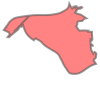

In [47]:
z_15132

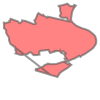

In [48]:
z_15025 = Polygon([[-79.922853, 40.255165], [-79.923282, 40.254924], [-79.923423, 40.254896], [-79.923383, 40.25492], [-79.923367, 40.254937], [-79.923353, 40.254977], [-79.923355, 40.254998], [-79.923364, 40.255018], [-79.923379, 40.255036], [-79.923774, 40.255266], [-79.92412, 40.255546], [-79.92428, 40.255593], [-79.92454, 40.255669], [-79.925322, 40.255899], [-79.925584, 40.255977], [-79.925633, 40.255991], [-79.925783, 40.256036], [-79.925833, 40.256051], [-79.928776, 40.256926], [-79.929636, 40.257183], [-79.937606, 40.259556], [-79.940209, 40.260332], [-79.940274, 40.260351], [-79.940484, 40.260416], [-79.940551, 40.260559], [-79.940599, 40.260656], [-79.94062, 40.260709], [-79.940647, 40.260778], [-79.940662, 40.260888], [-79.940646, 40.261016], [-79.940596, 40.261139], [-79.94057, 40.261189], [-79.940502, 40.261319], [-79.940455, 40.261439], [-79.94041, 40.261601], [-79.940404, 40.261628], [-79.940347, 40.261949], [-79.940312, 40.262099], [-79.940298, 40.26222], [-79.940184, 40.262243], [-79.939931, 40.26224], [-79.939507, 40.262223], [-79.939299, 40.262236], [-79.939094, 40.262269], [-79.938896, 40.262323], [-79.937702, 40.262666], [-79.937312, 40.262794], [-79.937119, 40.262862], [-79.936931, 40.262937], [-79.936747, 40.263018], [-79.93657, 40.263107], [-79.93587, 40.263477], [-79.935699, 40.263574], [-79.935195, 40.263873], [-79.935031, 40.263977], [-79.934856, 40.264064], [-79.934668, 40.264135], [-79.93447, 40.264189], [-79.933861, 40.264331], [-79.933659, 40.264382], [-79.933266, 40.264505], [-79.933105, 40.264566], [-79.932866, 40.264672], [-79.932676, 40.26477], [-79.932482, 40.264863], [-79.932089, 40.265043], [-79.931297, 40.265393], [-79.931254, 40.265416], [-79.931091, 40.265502], [-79.930985, 40.265563], [-79.930907, 40.265607], [-79.930731, 40.265715], [-79.930574, 40.265838], [-79.93047, 40.265948], [-79.930442, 40.265978], [-79.930328, 40.266129], [-79.930224, 40.266285], [-79.93021, 40.266309], [-79.930134, 40.266439], [-79.930048, 40.266608], [-79.92996, 40.266767], [-79.929895, 40.266838], [-79.929707, 40.26698], [-79.929677, 40.266997], [-79.92948, 40.267078], [-79.929267, 40.26714], [-79.929036, 40.267192], [-79.928654, 40.267276], [-79.928678, 40.267401], [-79.928543, 40.267439], [-79.927527, 40.267677], [-79.927312, 40.267711], [-79.927105, 40.267759], [-79.92691, 40.267829], [-79.92673, 40.267915], [-79.926552, 40.268053], [-79.92645, 40.268161], [-79.926348, 40.268323], [-79.926255, 40.268492], [-79.926169, 40.268648], [-79.926072, 40.268625], [-79.925847, 40.268586], [-79.925799, 40.268576], [-79.925748, 40.268601], [-79.925711, 40.26861], [-79.925662, 40.268637], [-79.925604, 40.26865], [-79.925303, 40.268638], [-79.924658, 40.268587], [-79.924371, 40.268557], [-79.924349, 40.268543], [-79.924285, 40.268525], [-79.924185, 40.268515], [-79.92402, 40.268446], [-79.923936, 40.268391], [-79.923919, 40.268367], [-79.923873, 40.268316], [-79.923765, 40.268075], [-79.916053, 40.268122], [-79.904198, 40.271885], [-79.901132, 40.271914], [-79.900848, 40.271626], [-79.900878, 40.2716], [-79.90099, 40.271519], [-79.901082, 40.271464], [-79.901111, 40.271447], [-79.901239, 40.271381], [-79.901612, 40.27122], [-79.901643, 40.271208], [-79.901881, 40.271111], [-79.901998, 40.27102], [-79.902281, 40.270887], [-79.903534, 40.270302], [-79.90356, 40.270291], [-79.903969, 40.270149], [-79.90408, 40.270086], [-79.904186, 40.270028], [-79.904417, 40.269901], [-79.90453, 40.26984], [-79.904323, 40.269701], [-79.903575, 40.269253], [-79.90306, 40.268944], [-79.902719, 40.268741], [-79.902663, 40.268707], [-79.902456, 40.268583], [-79.902283, 40.268479], [-79.902171, 40.268412], [-79.901893, 40.268246], [-79.901535, 40.26803], [-79.901476, 40.268079], [-79.899961, 40.269145], [-79.89987, 40.269201], [-79.899776, 40.269112], [-79.899687, 40.269048], [-79.898295, 40.267929], [-79.898136, 40.267804], [-79.897369, 40.267161], [-79.897449, 40.267104], [-79.89749, 40.267074], [-79.897632, 40.266973], [-79.898695, 40.266077], [-79.898929, 40.265913], [-79.899421, 40.265569], [-79.89995, 40.265138], [-79.900144, 40.264974], [-79.900288, 40.264852], [-79.901136, 40.264114], [-79.901987, 40.263491], [-79.902314, 40.263244], [-79.902754, 40.262914], [-79.903453, 40.262426], [-79.904271, 40.261944], [-79.905146, 40.261461], [-79.906027, 40.260981], [-79.906707, 40.260559], [-79.906927, 40.260423], [-79.907294, 40.26017], [-79.907824, 40.259804], [-79.908773, 40.259137], [-79.909652, 40.25846], [-79.910347, 40.257832], [-79.910594, 40.257594], [-79.910872, 40.257327], [-79.911444, 40.256757], [-79.911692, 40.256472], [-79.912075, 40.255926], [-79.912124, 40.255842], [-79.913035, 40.254326], [-79.913116, 40.254201], [-79.913883, 40.25303], [-79.914139, 40.252518], [-79.914376, 40.25259], [-79.914468, 40.252618], [-79.914536, 40.252639], [-79.914934, 40.252762], [-79.915461, 40.252923], [-79.915546, 40.25295], [-79.915787, 40.253043], [-79.915844, 40.253065], [-79.915994, 40.253124], [-79.916021, 40.253132], [-79.916083, 40.253152], [-79.916456, 40.253261], [-79.917576, 40.253591], [-79.917627, 40.253606], [-79.91785, 40.253638], [-79.917875, 40.253647], [-79.917955, 40.253677], [-79.917967, 40.253681], [-79.918005, 40.253696], [-79.918008, 40.253697], [-79.918022, 40.253703], [-79.918107, 40.253734], [-79.918373, 40.253767], [-79.918461, 40.253783], [-79.919166, 40.253961], [-79.919202, 40.253972], [-79.921028, 40.254528], [-79.921053, 40.254536], [-79.921394, 40.254654], [-79.921663, 40.254747], [-79.922084, 40.254894], [-79.922117, 40.254905], [-79.922251, 40.254951], [-79.922264, 40.254955], [-79.922705, 40.255112], [-79.922853, 40.255165], [-79.970153, 40.291794], [-79.970435, 40.291962], [-79.971043, 40.292324], [-79.971495, 40.293293], [-79.972021, 40.29466], [-79.972301, 40.295397], [-79.972512, 40.29595], [-79.972653, 40.296313], [-79.972826, 40.297045], [-79.972904, 40.297373], [-79.972961, 40.29762], [-79.972951, 40.297737], [-79.972879, 40.298606], [-79.972784, 40.299738], [-79.973008, 40.300181], [-79.973389, 40.300789], [-79.973634, 40.301179], [-79.973834, 40.301497], [-79.973879, 40.301571], [-79.973914, 40.301626], [-79.974182, 40.302098], [-79.974602, 40.302829], [-79.975092, 40.3037], [-79.975522, 40.304458], [-79.975716, 40.304788], [-79.975943, 40.305201], [-79.976001, 40.305315], [-79.976372, 40.306044], [-79.976386, 40.306335], [-79.976407, 40.306717], [-79.976405, 40.307095], [-79.976405, 40.307351], [-79.976411, 40.307615], [-79.976389, 40.308398], [-79.976374, 40.308953], [-79.976368, 40.309194], [-79.976446, 40.309267], [-79.97708, 40.309862], [-79.977657, 40.310404], [-79.978301, 40.311002], [-79.978926, 40.311589], [-79.979022, 40.311685], [-79.978998, 40.312322], [-79.978982, 40.312742], [-79.978971, 40.313064], [-79.9789, 40.315037], [-79.978925, 40.315431], [-79.978936, 40.315572], [-79.978955, 40.315856], [-79.97901, 40.316649], [-79.978991, 40.316693], [-79.978967, 40.31674], [-79.97894, 40.316794], [-79.978926, 40.316813], [-79.978841, 40.316935], [-79.978772, 40.317016], [-79.978718, 40.317081], [-79.978854, 40.317158], [-79.978988, 40.317228], [-79.979123, 40.317298], [-79.979177, 40.317578], [-79.979327, 40.318338], [-79.979314, 40.318346], [-79.97913, 40.318458], [-79.979065, 40.318498], [-79.978971, 40.318559], [-79.978778, 40.318371], [-79.978201, 40.31781], [-79.978087, 40.317699], [-79.978009, 40.317624], [-79.977972, 40.317597], [-79.977861, 40.317516], [-79.977824, 40.317489], [-79.977747, 40.317575], [-79.977726, 40.3176], [-79.97759, 40.317722], [-79.977482, 40.317795], [-79.977387, 40.31786], [-79.977376, 40.317868], [-79.977291, 40.317891], [-79.977171, 40.317926], [-79.976996, 40.317969], [-79.976898, 40.317994], [-79.976516, 40.318089], [-79.976172, 40.318173], [-79.975549, 40.318328], [-79.974766, 40.318498], [-79.973986, 40.318667], [-79.9735, 40.318773], [-79.973255, 40.318818], [-79.972915, 40.318881], [-79.972071, 40.319038], [-79.972005, 40.319429], [-79.9721, 40.319736], [-79.972595, 40.320419], [-79.971581, 40.321434], [-79.971204, 40.322447], [-79.970918, 40.323084], [-79.969882, 40.322693], [-79.96885, 40.322304], [-79.968832, 40.322297], [-79.967321, 40.321706], [-79.966934, 40.321554], [-79.965763, 40.321096], [-79.964399, 40.320649], [-79.964068, 40.32054], [-79.962523, 40.320035], [-79.96216, 40.319916], [-79.962024, 40.319873], [-79.961941, 40.319788], [-79.961348, 40.318694], [-79.961313, 40.318613], [-79.95977, 40.317761], [-79.95964, 40.317689], [-79.959024, 40.318263], [-79.957525, 40.319632], [-79.956973, 40.320138], [-79.956905, 40.320267], [-79.956904, 40.320411], [-79.956908, 40.320466], [-79.956912, 40.320557], [-79.956925, 40.320833], [-79.95693, 40.320925], [-79.956931, 40.320948], [-79.956927, 40.321083], [-79.956919, 40.321181], [-79.956817, 40.321135], [-79.956128, 40.320911], [-79.955927, 40.320845], [-79.95577, 40.320823], [-79.95298, 40.320427], [-79.950291, 40.319402], [-79.949727, 40.319187], [-79.945653, 40.317632], [-79.942735, 40.316519], [-79.942554, 40.31645], [-79.942429, 40.316496], [-79.941223, 40.316942], [-79.940482, 40.317215], [-79.940524, 40.31731], [-79.940788, 40.317904], [-79.940876, 40.318102], [-79.941006, 40.318396], [-79.941397, 40.31928], [-79.941459, 40.319418], [-79.941528, 40.319575], [-79.941595, 40.319727], [-79.941639, 40.319827], [-79.94182, 40.320242], [-79.94197, 40.320587], [-79.942081, 40.320841], [-79.942131, 40.320963], [-79.942203, 40.321135], [-79.942056, 40.321193], [-79.941922, 40.321298], [-79.941828, 40.321373], [-79.941544, 40.321664], [-79.941232, 40.321985], [-79.940789, 40.322439], [-79.940677, 40.322578], [-79.940578, 40.322739], [-79.940531, 40.32286], [-79.940514, 40.322907], [-79.940433, 40.323302], [-79.940415, 40.323374], [-79.940399, 40.323435], [-79.94032, 40.323656], [-79.940276, 40.323784], [-79.939968, 40.324468], [-79.939963, 40.324476], [-79.939834, 40.324745], [-79.939374, 40.325684], [-79.939351, 40.325729], [-79.939334, 40.325766], [-79.939031, 40.326459], [-79.939003, 40.326544], [-79.938878, 40.326938], [-79.938818, 40.327137], [-79.938755, 40.327312], [-79.938666, 40.327482], [-79.938568, 40.32765], [-79.938482, 40.32782], [-79.938411, 40.327994], [-79.938358, 40.328173], [-79.938315, 40.328352], [-79.938255, 40.328528], [-79.938182, 40.328683], [-79.938127, 40.328771], [-79.938071, 40.328864], [-79.938028, 40.328929], [-79.937748, 40.329356], [-79.937608, 40.329543], [-79.937505, 40.329673], [-79.937473, 40.329712], [-79.937382, 40.329829], [-79.937379, 40.329832], [-79.937351, 40.329874], [-79.937307, 40.329938], [-79.935513, 40.328895], [-79.932389, 40.327083], [-79.932371, 40.327107], [-79.932308, 40.327191], [-79.932174, 40.32737], [-79.93214, 40.327416], [-79.931763, 40.3279], [-79.931727, 40.327948], [-79.931708, 40.327967], [-79.931594, 40.328042], [-79.931509, 40.327948], [-79.931254, 40.327669], [-79.931169, 40.327576], [-79.930863, 40.327234], [-79.930483, 40.326809], [-79.930317, 40.326629], [-79.930139, 40.326459], [-79.929887, 40.326272], [-79.929876, 40.326264], [-79.929703, 40.326146], [-79.929518, 40.326042], [-79.929497, 40.326033], [-79.929317, 40.325954], [-79.929135, 40.325885], [-79.928824, 40.325768], [-79.928479, 40.325639], [-79.928274, 40.325555], [-79.928044, 40.325449], [-79.927853, 40.325345], [-79.927682, 40.325229], [-79.927522, 40.325099], [-79.92738, 40.324959], [-79.927255, 40.324809], [-79.927148, 40.324652], [-79.927096, 40.324556], [-79.927056, 40.324479], [-79.926238, 40.324568], [-79.925802, 40.325599], [-79.921267, 40.324584], [-79.91926, 40.324136], [-79.918482, 40.323962], [-79.917749, 40.323799], [-79.917291, 40.323696], [-79.916118, 40.323433], [-79.915104, 40.323207], [-79.914664, 40.323109], [-79.912012, 40.322516], [-79.910987, 40.322287], [-79.910502, 40.322178], [-79.908828, 40.321804], [-79.90822, 40.321668], [-79.906821, 40.321355], [-79.905486, 40.321056], [-79.905323, 40.32102], [-79.901255, 40.320116], [-79.900174, 40.319871], [-79.900071, 40.319848], [-79.900146, 40.319961], [-79.900235, 40.320071], [-79.900242, 40.32008], [-79.900265, 40.320108], [-79.900273, 40.320118], [-79.900314, 40.320169], [-79.90051, 40.320363], [-79.900533, 40.320384], [-79.900742, 40.320572], [-79.90149, 40.321231], [-79.901589, 40.321316], [-79.901789, 40.321557], [-79.901833, 40.321632], [-79.901937, 40.321862], [-79.902004, 40.322145], [-79.902057, 40.322401], [-79.902258, 40.323362], [-79.902317, 40.323604], [-79.902348, 40.323682], [-79.90248, 40.323902], [-79.902537, 40.323972], [-79.90257, 40.324004], [-79.902786, 40.324182], [-79.902868, 40.324234], [-79.902912, 40.324257], [-79.90319, 40.324374], [-79.903289, 40.324404], [-79.903341, 40.324416], [-79.903652, 40.32446], [-79.903706, 40.324464], [-79.904027, 40.324472], [-79.904348, 40.324466], [-79.904665, 40.324435], [-79.904979, 40.324385], [-79.905605, 40.324269], [-79.905919, 40.324229], [-79.905973, 40.324227], [-79.906292, 40.324231], [-79.907248, 40.324311], [-79.907998, 40.324375], [-79.908367, 40.324424], [-79.908669, 40.324498], [-79.909002, 40.324625], [-79.909048, 40.324646], [-79.909307, 40.32479], [-79.909558, 40.324945], [-79.909807, 40.3251], [-79.910045, 40.325266], [-79.910538, 40.325582], [-79.910757, 40.325757], [-79.91079, 40.325789], [-79.910969, 40.325993], [-79.910995, 40.326028], [-79.911122, 40.326252], [-79.911158, 40.326329], [-79.911193, 40.326446], [-79.911228, 40.326639], [-79.911232, 40.326809], [-79.911228, 40.326908], [-79.911201, 40.327092], [-79.911183, 40.32715], [-79.911163, 40.327213], [-79.911046, 40.327498], [-79.911031, 40.327518], [-79.910898, 40.327692], [-79.910348, 40.328389], [-79.910238, 40.328575], [-79.91014, 40.328764], [-79.910065, 40.32896], [-79.910045, 40.329029], [-79.910009, 40.329158], [-79.909969, 40.329359], [-79.909948, 40.329562], [-79.909952, 40.329765], [-79.909972, 40.329968], [-79.910007, 40.330169], [-79.91007, 40.330367], [-79.910141, 40.330564], [-79.910603, 40.331738], [-79.910672, 40.331935], [-79.910726, 40.332134], [-79.910759, 40.332337], [-79.910783, 40.33254], [-79.910929, 40.334198], [-79.911055, 40.33552], [-79.911119, 40.336181], [-79.911148, 40.336421], [-79.911199, 40.336602], [-79.911224, 40.33669], [-79.911361, 40.33701], [-79.911526, 40.337313], [-79.911724, 40.337588], [-79.911963, 40.337816], [-79.91207, 40.337913], [-79.91287, 40.338637], [-79.912871, 40.338708], [-79.912855, 40.338767], [-79.912832, 40.338803], [-79.912799, 40.338835], [-79.912736, 40.338871], [-79.91265, 40.338897], [-79.912593, 40.338883], [-79.912355, 40.338843], [-79.912177, 40.338826], [-79.912112, 40.338821], [-79.911867, 40.338817], [-79.911622, 40.338833], [-79.911381, 40.338866], [-79.909019, 40.339415], [-79.908741, 40.339476], [-79.908452, 40.339547], [-79.908218, 40.339601], [-79.907035, 40.339878], [-79.906905, 40.339911], [-79.906801, 40.339938], [-79.906581, 40.339982], [-79.905937, 40.340137], [-79.905404, 40.340266], [-79.905172, 40.34033], [-79.904946, 40.340404], [-79.904498, 40.340562], [-79.90425, 40.340666], [-79.903177, 40.341134], [-79.903141, 40.341149], [-79.902962, 40.341224], [-79.902704, 40.341319], [-79.902567, 40.341347], [-79.902446, 40.34136], [-79.902323, 40.34136], [-79.902224, 40.341352], [-79.902184, 40.341344], [-79.902158, 40.341338], [-79.9021, 40.341317], [-79.902006, 40.341277], [-79.901884, 40.341226], [-79.90164, 40.341107], [-79.901513, 40.341], [-79.901439, 40.340937], [-79.901395, 40.340879], [-79.901382, 40.340865], [-79.901275, 40.340744], [-79.901256, 40.340722], [-79.901158, 40.340611], [-79.900851, 40.34032], [-79.900848, 40.340317], [-79.900704, 40.340201], [-79.900223, 40.339753], [-79.899772, 40.339332], [-79.899533, 40.339125], [-79.89918, 40.338831], [-79.899088, 40.338755], [-79.898861, 40.338596], [-79.898731, 40.338516], [-79.898705, 40.338503], [-79.898627, 40.338464], [-79.898481, 40.33842], [-79.898293, 40.338374], [-79.898146, 40.338362], [-79.89812, 40.338363], [-79.898071, 40.338359], [-79.897996, 40.338354], [-79.897967, 40.338354], [-79.897655, 40.338356], [-79.897551, 40.338357], [-79.89706, 40.338392], [-79.89681, 40.338411], [-79.896596, 40.338421], [-79.896384, 40.338417], [-79.896176, 40.338392], [-79.895975, 40.33834], [-79.895616, 40.338214], [-79.89555, 40.338191], [-79.895155, 40.338046], [-79.895123, 40.338034], [-79.895029, 40.338], [-79.894998, 40.337989], [-79.894857, 40.338258], [-79.894769, 40.33841], [-79.8946, 40.338708], [-79.894067, 40.339601], [-79.894039, 40.33965], [-79.893858, 40.339983], [-79.892849, 40.339474], [-79.892784, 40.339442], [-79.892492, 40.339295], [-79.892066, 40.339081], [-79.891884, 40.33899], [-79.8927, 40.337958], [-79.893851, 40.33646], [-79.894058, 40.336118], [-79.894867, 40.334778], [-79.894975, 40.334628], [-79.895431, 40.333741], [-79.895813, 40.332782], [-79.896169, 40.331639], [-79.896364, 40.33093], [-79.896294, 40.330882], [-79.896376, 40.330889], [-79.896489, 40.330435], [-79.896649, 40.329592], [-79.896799, 40.328799], [-79.896921, 40.327989], [-79.897027, 40.327349], [-79.897084, 40.327005], [-79.897214, 40.32576], [-79.897367, 40.32495], [-79.897465, 40.324433], [-79.897495, 40.324271], [-79.897558, 40.323401], [-79.897559, 40.322008], [-79.897538, 40.321525], [-79.897432, 40.321127], [-79.897402, 40.321015], [-79.897279, 40.320782], [-79.897068, 40.320392], [-79.896923, 40.320154], [-79.896675, 40.319746], [-79.896003, 40.318867], [-79.895638, 40.318469], [-79.895009, 40.317783], [-79.894051, 40.316969], [-79.893476, 40.31648], [-79.893317, 40.316345], [-79.893004, 40.316073], [-79.892826, 40.315919], [-79.892237, 40.315397], [-79.89139, 40.314728], [-79.890105, 40.314124], [-79.889048, 40.313642], [-79.887652, 40.313022], [-79.887235, 40.312837], [-79.886891, 40.312685], [-79.885638, 40.3121], [-79.884626, 40.311709], [-79.884482, 40.311638], [-79.884144, 40.311503], [-79.883277, 40.311254], [-79.882677, 40.311081], [-79.881578, 40.310778], [-79.881388, 40.310727], [-79.880719, 40.310527], [-79.880048, 40.310287], [-79.878429, 40.30964], [-79.876862, 40.30906], [-79.876217, 40.308706], [-79.875301, 40.308051], [-79.873385, 40.306658], [-79.872359, 40.305746], [-79.871528, 40.305112], [-79.870322, 40.30403], [-79.869734, 40.303502], [-79.868453, 40.302003], [-79.868365, 40.301771], [-79.86778, 40.300231], [-79.867523, 40.299176], [-79.867409, 40.298707], [-79.867309, 40.298298], [-79.867126, 40.297289], [-79.867021, 40.295989], [-79.867142, 40.294511], [-79.867252, 40.293799], [-79.86748, 40.292926], [-79.867746, 40.292193], [-79.86832, 40.291141], [-79.868784, 40.290483], [-79.869633, 40.28928], [-79.870686, 40.287896], [-79.871251, 40.287378], [-79.872086, 40.286611], [-79.872818, 40.286076], [-79.87494, 40.284442], [-79.876178, 40.283596], [-79.876612, 40.283371], [-79.877097, 40.283061], [-79.87772, 40.282598], [-79.878977, 40.281681], [-79.880538, 40.280631], [-79.881286, 40.280197], [-79.881702, 40.279955], [-79.882195, 40.27969], [-79.882597, 40.279474], [-79.88272, 40.279409], [-79.882952, 40.279284], [-79.883037, 40.279243], [-79.883301, 40.279114], [-79.883688, 40.278926], [-79.884189, 40.278682], [-79.884427, 40.278506], [-79.884928, 40.278135], [-79.885145, 40.277974], [-79.885349, 40.277823], [-79.886113, 40.277089], [-79.886293, 40.276917], [-79.887141, 40.277602], [-79.887197, 40.277648], [-79.887357, 40.277769], [-79.887692, 40.278097], [-79.887754, 40.278158], [-79.887886, 40.278288], [-79.888143, 40.278065], [-79.888367, 40.277872], [-79.888643, 40.277684], [-79.889208, 40.277301], [-79.889721, 40.276971], [-79.890166, 40.276695], [-79.890667, 40.276414], [-79.891349, 40.276092], [-79.894562, 40.27438], [-79.894606, 40.274376], [-79.894707, 40.27437], [-79.894841, 40.274356], [-79.89655, 40.273876], [-79.897153, 40.273556], [-79.897233, 40.27352], [-79.897328, 40.273466], [-79.897572, 40.273339], [-79.89774, 40.273242], [-79.897782, 40.273218], [-79.898174, 40.272997], [-79.89851, 40.272826], [-79.898818, 40.272699], [-79.899001, 40.272599], [-79.899539, 40.272326], [-79.899728, 40.27223], [-79.899964, 40.272114], [-79.900016, 40.2721], [-79.900082, 40.272097], [-79.900157, 40.272098], [-79.900211, 40.272098], [-79.900274, 40.272092], [-79.900347, 40.272077], [-79.900398, 40.272061], [-79.900442, 40.272047], [-79.900482, 40.272023], [-79.900531, 40.271985], [-79.900609, 40.272021], [-79.900884, 40.272175], [-79.901131, 40.272341], [-79.901482, 40.272576], [-79.90209, 40.272968], [-79.902131, 40.272995], [-79.902489, 40.273233], [-79.902694, 40.273359], [-79.902731, 40.273378], [-79.902959, 40.273476], [-79.902999, 40.27349], [-79.903244, 40.273551], [-79.903765, 40.273616], [-79.90402, 40.273662], [-79.904271, 40.273722], [-79.904514, 40.273796], [-79.904743, 40.273892], [-79.904778, 40.27391], [-79.904965, 40.274049], [-79.904993, 40.274075], [-79.905138, 40.27424], [-79.905259, 40.274418], [-79.905368, 40.274603], [-79.905468, 40.274788], [-79.903421, 40.275437], [-79.903506, 40.275525], [-79.903695, 40.275732], [-79.903813, 40.27586], [-79.904118, 40.27623], [-79.904378, 40.276587], [-79.904604, 40.276953], [-79.904799, 40.277332], [-79.904972, 40.277719], [-79.90501, 40.277817], [-79.905075, 40.278032], [-79.905154, 40.278317], [-79.905251, 40.27859], [-79.905264, 40.278629], [-79.905305, 40.278747], [-79.905395, 40.27902], [-79.905513, 40.279281], [-79.905552, 40.279366], [-79.905584, 40.279422], [-79.905653, 40.279524], [-79.9059, 40.279833], [-79.906211, 40.280144], [-79.906432, 40.280316], [-79.906603, 40.280426], [-79.90644, 40.280499], [-79.906071, 40.280668], [-79.905947, 40.280704], [-79.90593, 40.28071], [-79.905819, 40.280737], [-79.905776, 40.280751], [-79.905495, 40.280829], [-79.905443, 40.280847], [-79.905414, 40.280852], [-79.905351, 40.280865], [-79.905075, 40.280893], [-79.904936, 40.2809], [-79.904799, 40.280906], [-79.90429, 40.280939], [-79.903915, 40.280964], [-79.903923, 40.28105], [-79.903955, 40.28115], [-79.903988, 40.281228], [-79.904009, 40.281261], [-79.90409, 40.281355], [-79.904165, 40.281417], [-79.904397, 40.28154], [-79.90464, 40.281646], [-79.904677, 40.281667], [-79.90488, 40.281819], [-79.905054, 40.281979], [-79.905063, 40.281987], [-79.905253, 40.282149], [-79.90547, 40.282289], [-79.905695, 40.282423], [-79.905729, 40.282448], [-79.905907, 40.282615], [-79.906203, 40.282988], [-79.906372, 40.28316], [-79.906569, 40.283312], [-79.906798, 40.283443], [-79.907076, 40.283561], [-79.90734, 40.283631], [-79.907614, 40.283679], [-79.907661, 40.283684], [-79.907942, 40.283684], [-79.908035, 40.283672], [-79.908293, 40.283597], [-79.908333, 40.283579], [-79.908548, 40.283443], [-79.908735, 40.283257], [-79.908758, 40.283227], [-79.908864, 40.28303], [-79.908874, 40.282996], [-79.908884, 40.282922], [-79.908883, 40.282905], [-79.908883, 40.28285], [-79.908825, 40.282639], [-79.908626, 40.282], [-79.908596, 40.281786], [-79.908596, 40.281749], [-79.90864, 40.281543], [-79.908716, 40.281369], [-79.909121, 40.281542], [-79.909407, 40.281679], [-79.909586, 40.281765], [-79.909657, 40.28181], [-79.91008, 40.282121], [-79.910424, 40.282452], [-79.910699, 40.282811], [-79.910914, 40.283195], [-79.910948, 40.283286], [-79.911043, 40.283536], [-79.911066, 40.283598], [-79.911162, 40.284013], [-79.911194, 40.283956], [-79.916927, 40.284081], [-79.916591, 40.283531], [-79.923202, 40.281573], [-79.923722, 40.282663], [-79.923898, 40.283019], [-79.925049, 40.285397], [-79.925325, 40.285295], [-79.926271, 40.28518], [-79.926546, 40.285149], [-79.929601, 40.284808], [-79.93496, 40.284161], [-79.936169, 40.283342], [-79.936209, 40.282778], [-79.93626, 40.282025], [-79.93593, 40.279539], [-79.939376, 40.27907], [-79.940272, 40.279029], [-79.940901, 40.279049], [-79.942388, 40.278979], [-79.94284, 40.279067], [-79.943201, 40.27921], [-79.943619, 40.279482], [-79.94397, 40.279838], [-79.944595, 40.280554], [-79.945473, 40.28163], [-79.945685, 40.281801], [-79.945928, 40.281977], [-79.946412, 40.282195], [-79.946968, 40.282294], [-79.9475, 40.282269], [-79.948066, 40.28215], [-79.94838, 40.282039], [-79.948813, 40.28169], [-79.949518, 40.281021], [-79.950258, 40.280526], [-79.950898, 40.280263], [-79.951485, 40.280075], [-79.952045, 40.279968], [-79.952161, 40.279947], [-79.952276, 40.279928], [-79.952512, 40.279887], [-79.95263, 40.279867], [-79.95275, 40.279847], [-79.953113, 40.279787], [-79.953235, 40.279768], [-79.953469, 40.279733], [-79.954172, 40.279629], [-79.954339, 40.279605], [-79.954407, 40.279595], [-79.954538, 40.279571], [-79.95463, 40.279554], [-79.955427, 40.279409], [-79.955632, 40.279373], [-79.956135, 40.279282], [-79.956922, 40.279185], [-79.957389, 40.279179], [-79.95792, 40.279234], [-79.959046, 40.279383], [-79.959337, 40.279421], [-79.959829, 40.279486], [-79.960273, 40.279666], [-79.961685, 40.280095], [-79.962003, 40.280192], [-79.964765, 40.281037], [-79.964966, 40.281093], [-79.964279, 40.281931], [-79.964041, 40.282174], [-79.963945, 40.282273], [-79.964045, 40.282507], [-79.964204, 40.282886], [-79.964487, 40.283554], [-79.964569, 40.283693], [-79.964624, 40.283886], [-79.965208, 40.285262], [-79.965299, 40.286356], [-79.965495, 40.288772], [-79.967047, 40.289765], [-79.967221, 40.289898], [-79.967693, 40.290195], [-79.967911, 40.290319], [-79.96825, 40.290525], [-79.968529, 40.290698], [-79.968951, 40.291022], [-79.970153, 40.291794]]
)
z_15025

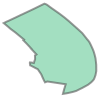

In [49]:
z_15110 = Polygon([[-79.857288, 40.370852], [-79.857593, 40.371184], [-79.857738, 40.371341], [-79.858795, 40.37247], [-79.859196, 40.372899], [-79.859133, 40.372935], [-79.859543, 40.373375], [-79.859739, 40.373584], [-79.860056, 40.373923], [-79.860723, 40.374634], [-79.860853, 40.374773], [-79.861525, 40.375453], [-79.861938, 40.37587], [-79.861863, 40.375933], [-79.861674, 40.376095], [-79.863598, 40.377672], [-79.864689, 40.378584], [-79.866006, 40.379563], [-79.866332, 40.379805], [-79.866401, 40.379857], [-79.866437, 40.379884], [-79.86794, 40.381176], [-79.868755, 40.381845], [-79.868856, 40.381928], [-79.868805, 40.381953], [-79.868551, 40.382068], [-79.868027, 40.38234], [-79.867472, 40.382595], [-79.867235, 40.382684], [-79.866866, 40.382858], [-79.866563, 40.383001], [-79.866438, 40.38306], [-79.866183, 40.38318], [-79.86547, 40.383515], [-79.865333, 40.38358], [-79.865313, 40.38359], [-79.86471, 40.383873], [-79.864021, 40.384205], [-79.863339, 40.38453], [-79.863091, 40.384649], [-79.862863, 40.384764], [-79.862823, 40.384792], [-79.862544, 40.384906], [-79.862427, 40.384955], [-79.861143, 40.385561], [-79.859489, 40.386341], [-79.8587, 40.386714], [-79.858656, 40.386735], [-79.858461, 40.386826], [-79.85835, 40.386879], [-79.858038, 40.387032], [-79.857921, 40.38709], [-79.857836, 40.387131], [-79.856494, 40.38779], [-79.855975, 40.388045], [-79.855812, 40.388126], [-79.854721, 40.388662], [-79.854501, 40.38877], [-79.854242, 40.388685], [-79.853959, 40.388589], [-79.853495, 40.388332], [-79.85291, 40.387893], [-79.852631, 40.387685], [-79.852426, 40.387536], [-79.851574, 40.386922], [-79.851557, 40.386909], [-79.849252, 40.385304], [-79.848851, 40.385003], [-79.847362, 40.383866], [-79.845887, 40.382637], [-79.842565, 40.379692], [-79.841155, 40.378408], [-79.840191, 40.377196], [-79.839257, 40.376019], [-79.839119, 40.375899], [-79.839025, 40.375769], [-79.838748, 40.375394], [-79.838592, 40.375179], [-79.838039, 40.37407], [-79.837348, 40.372548], [-79.836989, 40.371582], [-79.836594, 40.370109], [-79.836459, 40.369511], [-79.83626, 40.367892], [-79.836211, 40.367375], [-79.836188, 40.367129], [-79.836169, 40.364992], [-79.836463, 40.363522], [-79.836966, 40.362152], [-79.837386, 40.361621], [-79.837964, 40.361031], [-79.839085, 40.360158], [-79.841117, 40.359046], [-79.841884, 40.358669], [-79.842478, 40.358372], [-79.843281, 40.357971], [-79.843731, 40.357841], [-79.84408, 40.35774], [-79.844622, 40.357585], [-79.846151, 40.357241], [-79.84637, 40.357191], [-79.846921, 40.357101], [-79.847217, 40.357052], [-79.847397, 40.357022], [-79.847653, 40.35698], [-79.847944, 40.356932], [-79.847629, 40.358141], [-79.847538, 40.358495], [-79.847508, 40.358611], [-79.847311, 40.359192], [-79.847298, 40.359261], [-79.847288, 40.359322], [-79.847258, 40.359413], [-79.847217, 40.359542], [-79.847208, 40.35957], [-79.846969, 40.360337], [-79.847126, 40.360365], [-79.847601, 40.360434], [-79.84811, 40.360509], [-79.848907, 40.360629], [-79.849007, 40.360644], [-79.849553, 40.360726], [-79.850117, 40.360811], [-79.852036, 40.3611], [-79.852981, 40.361241], [-79.85345, 40.361311], [-79.854217, 40.361029], [-79.854275, 40.361012], [-79.854323, 40.361126], [-79.854364, 40.361207], [-79.85442, 40.361315], [-79.854501, 40.361443], [-79.85455, 40.361521], [-79.854591, 40.361586], [-79.854614, 40.361622], [-79.854689, 40.361799], [-79.85472, 40.361871], [-79.854749, 40.36194], [-79.854764, 40.361976], [-79.854844, 40.362146], [-79.854877, 40.362215], [-79.854963, 40.362396], [-79.855037, 40.362553], [-79.855153, 40.362804], [-79.855215, 40.362945], [-79.855296, 40.36313], [-79.855365, 40.3633], [-79.855399, 40.363385], [-79.855482, 40.363578], [-79.855592, 40.363804], [-79.855674, 40.36397], [-79.855696, 40.363998], [-79.855766, 40.364099], [-79.85604, 40.364492], [-79.856132, 40.364623], [-79.856434, 40.365076], [-79.856619, 40.365327], [-79.856664, 40.365436], [-79.856751, 40.365584], [-79.856795, 40.365627], [-79.856853, 40.365664], [-79.856919, 40.365695], [-79.857184, 40.365836], [-79.85731, 40.3659], [-79.857596, 40.366036], [-79.857625, 40.366031], [-79.857646, 40.366036], [-79.857736, 40.366113], [-79.857839, 40.366175], [-79.85812, 40.366318], [-79.858557, 40.366544], [-79.858633, 40.366583], [-79.858863, 40.366702], [-79.85894, 40.366742], [-79.859053, 40.3668], [-79.859238, 40.366895], [-79.859396, 40.366974], [-79.859474, 40.367013], [-79.859515, 40.36702], [-79.859529, 40.367118], [-79.859617, 40.367774], [-79.859629, 40.367883], [-79.859632, 40.367915], [-79.85963, 40.367939], [-79.859599, 40.368041], [-79.859485, 40.368034], [-79.85892, 40.367976], [-79.858821, 40.367963], [-79.858559, 40.367908], [-79.858216, 40.367836], [-79.858196, 40.367893], [-79.858051, 40.368353], [-79.857959, 40.368651], [-79.857915, 40.368791], [-79.857828, 40.36902], [-79.857774, 40.369198], [-79.857792, 40.369282], [-79.85778, 40.369336], [-79.857768, 40.369397], [-79.857794, 40.369873], [-79.857829, 40.370494], [-79.857496, 40.370716], [-79.857332, 40.370826], [-79.857288, 40.370852]]
)
z_15110

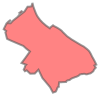

In [50]:
z_15133 = Polygon([[-79.87688, 40.344397], [-79.877125, 40.344567], [-79.87714, 40.344578], [-79.877285, 40.344685], [-79.877085, 40.344844], [-79.876488, 40.345324], [-79.876289, 40.345484], [-79.876208, 40.345425], [-79.875968, 40.345248], [-79.875888, 40.34519], [-79.87688, 40.344397], [-79.878116, 40.342798], [-79.877916, 40.342956], [-79.877827, 40.343028], [-79.877788, 40.343073], [-79.877654, 40.34318], [-79.877449, 40.343346], [-79.877253, 40.343502], [-79.877119, 40.343609], [-79.87699, 40.343707], [-79.876848, 40.343817], [-79.876766, 40.343882], [-79.876644, 40.343981], [-79.876607, 40.344008], [-79.876479, 40.344107], [-79.876406, 40.344163], [-79.876246, 40.34429], [-79.876042, 40.344454], [-79.875766, 40.344671], [-79.875606, 40.344798], [-79.875547, 40.344843], [-79.87537, 40.344982], [-79.875312, 40.345029], [-79.87519, 40.345125], [-79.875173, 40.345137], [-79.875047, 40.345238], [-79.874881, 40.34539], [-79.874858, 40.345417], [-79.8748, 40.345505], [-79.874704, 40.345653], [-79.874693, 40.345654], [-79.874609, 40.345786], [-79.874469, 40.346012], [-79.874273, 40.346314], [-79.873687, 40.347222], [-79.873492, 40.347525], [-79.87344, 40.347605], [-79.872527, 40.347618], [-79.872434, 40.347628], [-79.872374, 40.347635], [-79.872327, 40.34764], [-79.872198, 40.347662], [-79.872156, 40.347668], [-79.872064, 40.347682], [-79.871985, 40.347692], [-79.871751, 40.347725], [-79.871673, 40.347736], [-79.871669, 40.347742], [-79.87166, 40.347759], [-79.871657, 40.347766], [-79.871647, 40.347787], [-79.871404, 40.348523], [-79.871242, 40.349015], [-79.871202, 40.349019], [-79.871162, 40.349022], [-79.871074, 40.349028], [-79.871076, 40.349], [-79.871043, 40.348846], [-79.870972, 40.348664], [-79.870838, 40.348318], [-79.870853, 40.348295], [-79.870899, 40.348229], [-79.870915, 40.348207], [-79.870686, 40.347588], [-79.870056, 40.345878], [-79.869999, 40.345733], [-79.869759, 40.34512], [-79.869698, 40.344972], [-79.869515, 40.344528], [-79.869455, 40.344381], [-79.869133, 40.343702], [-79.868843, 40.343169], [-79.868557, 40.342719], [-79.868541, 40.342694], [-79.867469, 40.341273], [-79.866332, 40.340078], [-79.86474, 40.338701], [-79.863082, 40.337535], [-79.862941, 40.337438], [-79.862907, 40.33751], [-79.862871, 40.33758], [-79.862847, 40.337619], [-79.862741, 40.33774], [-79.862619, 40.337852], [-79.86185, 40.33846], [-79.861805, 40.338495], [-79.861746, 40.338542], [-79.861672, 40.338601], [-79.861628, 40.338637], [-79.861578, 40.338677], [-79.861529, 40.338717], [-79.861494, 40.338745], [-79.861405, 40.338816], [-79.861222, 40.338678], [-79.860849, 40.338398], [-79.8603, 40.338128], [-79.859827, 40.337896], [-79.859284, 40.337583], [-79.859008, 40.337424], [-79.858882, 40.337351], [-79.858834, 40.337304], [-79.858706, 40.337222], [-79.858675, 40.337202], [-79.858166, 40.336874], [-79.857388, 40.336291], [-79.857046, 40.335908], [-79.856666, 40.335487], [-79.855653, 40.334512], [-79.85481, 40.333668], [-79.853778, 40.332955], [-79.852709, 40.332187], [-79.849636, 40.330332], [-79.849294, 40.330121], [-79.848911, 40.32991], [-79.848292, 40.329527], [-79.846899, 40.328789], [-79.846385, 40.328388], [-79.845185, 40.327448], [-79.844336, 40.326608], [-79.843954, 40.326001], [-79.843571, 40.325337], [-79.842862, 40.323855], [-79.842729, 40.323671], [-79.84205, 40.322446], [-79.841572, 40.321546], [-79.840955, 40.320239], [-79.841395, 40.320054], [-79.841597, 40.319967], [-79.841748, 40.319897], [-79.841857, 40.319847], [-79.841707, 40.319592], [-79.841592, 40.319398], [-79.841554, 40.319338], [-79.841519, 40.319282], [-79.841412, 40.319112], [-79.841219, 40.31878], [-79.841231, 40.318769], [-79.841525, 40.31847], [-79.84169, 40.318251], [-79.84197, 40.317938], [-79.842084, 40.317773], [-79.842113, 40.317714], [-79.84217, 40.31753], [-79.842249, 40.317337], [-79.842364, 40.317145], [-79.842457, 40.317042], [-79.842708, 40.316824], [-79.842937, 40.316678], [-79.843081, 40.316571], [-79.843131, 40.316513], [-79.843217, 40.316451], [-79.843332, 40.316339], [-79.843568, 40.316197], [-79.843584, 40.316189], [-79.84382, 40.316087], [-79.844006, 40.316022], [-79.844064, 40.316014], [-79.844379, 40.315971], [-79.845032, 40.315762], [-79.845312, 40.315683], [-79.845491, 40.315658], [-79.845706, 40.315665], [-79.845893, 40.315685], [-79.846173, 40.315755], [-79.846366, 40.315833], [-79.846553, 40.315889], [-79.846782, 40.315901], [-79.846926, 40.315884], [-79.847249, 40.315793], [-79.847413, 40.315763], [-79.847859, 40.31579], [-79.847952, 40.315777], [-79.848023, 40.315755], [-79.848289, 40.315618], [-79.848397, 40.315597], [-79.848583, 40.315626], [-79.848698, 40.315591], [-79.848841, 40.315475], [-79.849028, 40.315252], [-79.849336, 40.314985], [-79.849522, 40.314887], [-79.849874, 40.314733], [-79.850153, 40.314587], [-79.850239, 40.314548], [-79.850274, 40.314544], [-79.85029, 40.31453], [-79.850584, 40.314452], [-79.850706, 40.314431], [-79.85105, 40.314312], [-79.851401, 40.314145], [-79.851545, 40.314092], [-79.85181, 40.314009], [-79.852506, 40.313719], [-79.8528, 40.313564], [-79.853216, 40.313289], [-79.853488, 40.313003], [-79.853574, 40.312959], [-79.853598, 40.312953], [-79.85374, 40.31292], [-79.853976, 40.312891], [-79.854198, 40.31288], [-79.854492, 40.312811], [-79.854693, 40.312722], [-79.854765, 40.31266], [-79.854794, 40.312656], [-79.85498, 40.312536], [-79.855023, 40.312491], [-79.855073, 40.312415], [-79.855145, 40.312254], [-79.855174, 40.312128], [-79.855209, 40.312047], [-79.857483, 40.31193], [-79.857932, 40.311909], [-79.858497, 40.311896], [-79.858541, 40.3116], [-79.85859, 40.311282], [-79.858719, 40.310467], [-79.858727, 40.31033], [-79.85873, 40.310296], [-79.858718, 40.310125], [-79.858696, 40.310012], [-79.858685, 40.309967], [-79.858652, 40.309834], [-79.858642, 40.30979], [-79.858832, 40.309725], [-79.859056, 40.30962], [-79.859204, 40.3095], [-79.859239, 40.309456], [-79.859309, 40.309309], [-79.859625, 40.308528], [-79.85984, 40.308028], [-79.860013, 40.307629], [-79.860041, 40.307581], [-79.860099, 40.307516], [-79.860148, 40.30748], [-79.860203, 40.307449], [-79.861449, 40.307014], [-79.862838, 40.30963], [-79.866439, 40.313928], [-79.868291, 40.317835], [-79.870014, 40.316022], [-79.872191, 40.315951], [-79.873101, 40.316808], [-79.873282, 40.31698], [-79.873874, 40.31754], [-79.873966, 40.317495], [-79.874355, 40.317294], [-79.874683, 40.317126], [-79.875245, 40.317859], [-79.874929, 40.31851], [-79.874693, 40.319076], [-79.874682, 40.319331], [-79.874514, 40.319712], [-79.874442, 40.319875], [-79.874326, 40.319999], [-79.87411, 40.320211], [-79.875846, 40.320835], [-79.876173, 40.320951], [-79.876294, 40.320995], [-79.87599, 40.3214], [-79.875892, 40.321532], [-79.875815, 40.321638], [-79.875546, 40.321996], [-79.875136, 40.32254], [-79.875087, 40.322606], [-79.874974, 40.322756], [-79.874901, 40.322852], [-79.874736, 40.323072], [-79.8747, 40.323121], [-79.874645, 40.323192], [-79.874416, 40.323497], [-79.874345, 40.323601], [-79.87231, 40.326443], [-79.873135, 40.327071], [-79.874238, 40.327959], [-79.874263, 40.327991], [-79.874497, 40.328211], [-79.874597, 40.328301], [-79.87503, 40.328694], [-79.875076, 40.328734], [-79.875102, 40.328764], [-79.875402, 40.329054], [-79.875414, 40.329063], [-79.875434, 40.329078], [-79.876278, 40.329432], [-79.876781, 40.329646], [-79.879522, 40.330815], [-79.88102, 40.331452], [-79.881111, 40.331491], [-79.881214, 40.331537], [-79.882713, 40.332221], [-79.883106, 40.3324], [-79.883121, 40.332447], [-79.88323, 40.33275], [-79.883244, 40.332808], [-79.883259, 40.33287], [-79.883406, 40.333465], [-79.88352, 40.33393], [-79.883725, 40.334755], [-79.883904, 40.335464], [-79.883676, 40.335876], [-79.883537, 40.336125], [-79.883582, 40.336157], [-79.883996, 40.336452], [-79.884714, 40.336966], [-79.884681, 40.337034], [-79.884516, 40.33738], [-79.883526, 40.339449], [-79.883482, 40.339539], [-79.883408, 40.339542], [-79.883289, 40.339811], [-79.883048, 40.340025], [-79.882432, 40.34063], [-79.881407, 40.341406], [-79.881558, 40.341226], [-79.882219, 40.340437], [-79.882396, 40.34018], [-79.882651, 40.339813], [-79.88178, 40.339779], [-79.881498, 40.339768], [-79.880352, 40.340994], [-79.880296, 40.341039], [-79.880131, 40.341175], [-79.880076, 40.341221], [-79.879752, 40.34148], [-79.878783, 40.342258], [-79.87846, 40.342518], [-79.878344, 40.342617], [-79.878326, 40.34263], [-79.878116, 40.342798]]
)
z_15133

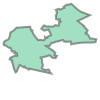

In [51]:
z_15122 = Polygon([[-79.889643, 40.380913], [-79.890494, 40.38125], [-79.890977, 40.381441], [-79.890849, 40.381661], [-79.890622, 40.381997], [-79.890599, 40.382033], [-79.890383, 40.382372], [-79.890183, 40.382717], [-79.890153, 40.382783], [-79.890071, 40.382954], [-79.890041, 40.38306], [-79.890013, 40.383161], [-79.890008, 40.383381], [-79.890009, 40.383462], [-79.89001, 40.383527], [-79.890013, 40.383682], [-79.889998, 40.383719], [-79.889976, 40.383781], [-79.89008, 40.383797], [-79.890237, 40.383831], [-79.890352, 40.383878], [-79.890474, 40.383273], [-79.890888, 40.383267], [-79.89089, 40.383237], [-79.890896, 40.383165], [-79.890914, 40.382961], [-79.891288, 40.383073], [-79.891381, 40.383102], [-79.892331, 40.383429], [-79.893011, 40.38366], [-79.8936, 40.383862], [-79.893925, 40.383973], [-79.894026, 40.384007], [-79.894088, 40.384029], [-79.894597, 40.384212], [-79.894589, 40.384269], [-79.894575, 40.384363], [-79.894568, 40.384428], [-79.894556, 40.384561], [-79.894543, 40.384758], [-79.894538, 40.384842], [-79.894535, 40.384908], [-79.894527, 40.385069], [-79.894518, 40.385245], [-79.894514, 40.385337], [-79.894499, 40.385535], [-79.894471, 40.385733], [-79.894463, 40.385771], [-79.894432, 40.385945], [-79.894391, 40.386414], [-79.894413, 40.386459], [-79.894416, 40.386465], [-79.894494, 40.386618], [-79.894521, 40.386669], [-79.894646, 40.386903], [-79.894685, 40.386997], [-79.894723, 40.387089], [-79.894785, 40.387279], [-79.894831, 40.387472], [-79.894854, 40.387665], [-79.894853, 40.387691], [-79.894852, 40.387748], [-79.894685, 40.387731], [-79.894652, 40.387935], [-79.894533, 40.38801], [-79.894418, 40.388157], [-79.894346, 40.388323], [-79.894317, 40.38841], [-79.894311, 40.388431], [-79.894245, 40.388768], [-79.894245, 40.388809], [-79.894152, 40.389218], [-79.894245, 40.389444], [-79.894252, 40.389552], [-79.893972, 40.390157], [-79.893929, 40.390202], [-79.893871, 40.390233], [-79.893785, 40.390259], [-79.893684, 40.39033], [-79.893655, 40.390366], [-79.89353, 40.390685], [-79.893498, 40.39077], [-79.893483, 40.390784], [-79.893476, 40.390846], [-79.893547, 40.390978], [-79.893562, 40.391127], [-79.893511, 40.391302], [-79.893488, 40.391503], [-79.893483, 40.391549], [-79.893425, 40.39181], [-79.893403, 40.391972], [-79.893418, 40.392013], [-79.893582, 40.392158], [-79.893575, 40.392181], [-79.893569, 40.392218], [-79.893532, 40.392451], [-79.893539, 40.392676], [-79.893568, 40.392744], [-79.893668, 40.392857], [-79.893733, 40.392961], [-79.894041, 40.393235], [-79.894171, 40.393403], [-79.894163, 40.393524], [-79.894242, 40.393637], [-79.894264, 40.393759], [-79.894242, 40.393845], [-79.894163, 40.393993], [-79.894163, 40.394056], [-79.894127, 40.394163], [-79.894031, 40.394286], [-79.894026, 40.394293], [-79.89389, 40.394418], [-79.89384, 40.394485], [-79.893732, 40.394696], [-79.893703, 40.394736], [-79.89366, 40.394907], [-79.893616, 40.394951], [-79.893616, 40.394994], [-79.893617, 40.395024], [-79.89359, 40.395108], [-79.893572, 40.395165], [-79.893524, 40.395322], [-79.893513, 40.395354], [-79.89357, 40.395368], [-79.893679, 40.395393], [-79.893619, 40.395417], [-79.893395, 40.395508], [-79.891401, 40.396307], [-79.891352, 40.396282], [-79.891243, 40.396235], [-79.891216, 40.396215], [-79.891069, 40.396108], [-79.890842, 40.39596], [-79.890716, 40.395878], [-79.890648, 40.395834], [-79.890446, 40.395702], [-79.890379, 40.395658], [-79.890214, 40.395541], [-79.890074, 40.395441], [-79.889789, 40.395232], [-79.889759, 40.395245], [-79.889391, 40.395517], [-79.888419, 40.395909], [-79.888365, 40.39593], [-79.88829, 40.39596], [-79.887002, 40.396486], [-79.886943, 40.396506], [-79.88689, 40.396533], [-79.886072, 40.396865], [-79.886001, 40.396893], [-79.88594, 40.396918], [-79.884622, 40.397451], [-79.88455, 40.397481], [-79.88473, 40.397743], [-79.884831, 40.397891], [-79.884859, 40.397932], [-79.884943, 40.398057], [-79.884971, 40.398099], [-79.885057, 40.398222], [-79.885315, 40.398594], [-79.885402, 40.398718], [-79.885286, 40.398764], [-79.884942, 40.398904], [-79.884827, 40.398951], [-79.884616, 40.399058], [-79.884422, 40.399182], [-79.884383, 40.399212], [-79.884247, 40.39932], [-79.884084, 40.399471], [-79.88394, 40.399631], [-79.883663, 40.399959], [-79.883514, 40.400118], [-79.883348, 40.400266], [-79.883297, 40.400306], [-79.883172, 40.400407], [-79.883105, 40.400451], [-79.883048, 40.400483], [-79.882861, 40.400576], [-79.882772, 40.400621], [-79.882472, 40.400732], [-79.882425, 40.400747], [-79.881859, 40.400941], [-79.881088, 40.401175], [-79.88064, 40.401312], [-79.880582, 40.401245], [-79.880408, 40.401047], [-79.88035, 40.400981], [-79.880347, 40.400977], [-79.880291, 40.400921], [-79.880158, 40.400821], [-79.879978, 40.400891], [-79.878613, 40.401428], [-79.878248, 40.401571], [-79.877772, 40.401758], [-79.877713, 40.401783], [-79.876562, 40.402272], [-79.876391, 40.402146], [-79.875029, 40.400801], [-79.87439, 40.400268], [-79.873356, 40.399218], [-79.87193, 40.398066], [-79.871155, 40.39726], [-79.870169, 40.396274], [-79.868377, 40.394938], [-79.865355, 40.392906], [-79.864108, 40.392268], [-79.864077, 40.392263], [-79.862212, 40.391582], [-79.859752, 40.39067], [-79.854501, 40.38877], [-79.854721, 40.388662], [-79.855812, 40.388126], [-79.855975, 40.388045], [-79.856494, 40.38779], [-79.857836, 40.387131], [-79.857921, 40.38709], [-79.858038, 40.387032], [-79.85835, 40.386879], [-79.858461, 40.386826], [-79.858656, 40.386735], [-79.8587, 40.386714], [-79.859489, 40.386341], [-79.861143, 40.385561], [-79.862427, 40.384955], [-79.862544, 40.384906], [-79.862823, 40.384792], [-79.862863, 40.384764], [-79.863091, 40.384649], [-79.863339, 40.38453], [-79.864021, 40.384205], [-79.86471, 40.383873], [-79.865313, 40.38359], [-79.865333, 40.38358], [-79.86547, 40.383515], [-79.866183, 40.38318], [-79.866438, 40.38306], [-79.866563, 40.383001], [-79.866866, 40.382858], [-79.867235, 40.382684], [-79.867472, 40.382595], [-79.868027, 40.38234], [-79.868551, 40.382068], [-79.868805, 40.381953], [-79.868856, 40.381928], [-79.868755, 40.381845], [-79.86794, 40.381176], [-79.866437, 40.379884], [-79.866401, 40.379857], [-79.866332, 40.379805], [-79.866006, 40.379563], [-79.864689, 40.378584], [-79.863598, 40.377672], [-79.861674, 40.376095], [-79.861863, 40.375933], [-79.861938, 40.37587], [-79.861525, 40.375453], [-79.860853, 40.374773], [-79.860723, 40.374634], [-79.860056, 40.373923], [-79.859739, 40.373584], [-79.859543, 40.373375], [-79.859133, 40.372935], [-79.859196, 40.372899], [-79.858795, 40.37247], [-79.857738, 40.371341], [-79.857593, 40.371184], [-79.857288, 40.370852], [-79.857332, 40.370826], [-79.857496, 40.370716], [-79.857829, 40.370494], [-79.857794, 40.369873], [-79.857768, 40.369397], [-79.85778, 40.369336], [-79.857792, 40.369282], [-79.857774, 40.369198], [-79.857828, 40.36902], [-79.857915, 40.368791], [-79.857959, 40.368651], [-79.858051, 40.368353], [-79.858196, 40.367893], [-79.858216, 40.367836], [-79.858559, 40.367908], [-79.858821, 40.367963], [-79.85892, 40.367976], [-79.859485, 40.368034], [-79.859599, 40.368041], [-79.85963, 40.367939], [-79.859632, 40.367915], [-79.859629, 40.367883], [-79.859617, 40.367774], [-79.859529, 40.367118], [-79.859515, 40.36702], [-79.859474, 40.367013], [-79.859396, 40.366974], [-79.859238, 40.366895], [-79.859053, 40.3668], [-79.85894, 40.366742], [-79.858863, 40.366702], [-79.858633, 40.366583], [-79.858557, 40.366544], [-79.85812, 40.366318], [-79.857839, 40.366175], [-79.857736, 40.366113], [-79.857646, 40.366036], [-79.857625, 40.366031], [-79.857596, 40.366036], [-79.85731, 40.3659], [-79.857184, 40.365836], [-79.856919, 40.365695], [-79.856853, 40.365664], [-79.856795, 40.365627], [-79.856751, 40.365584], [-79.856664, 40.365436], [-79.856619, 40.365327], [-79.856434, 40.365076], [-79.856132, 40.364623], [-79.85604, 40.364492], [-79.855766, 40.364099], [-79.855696, 40.363998], [-79.855674, 40.36397], [-79.855592, 40.363804], [-79.855482, 40.363578], [-79.855399, 40.363385], [-79.855365, 40.3633], [-79.855296, 40.36313], [-79.855215, 40.362945], [-79.855153, 40.362804], [-79.855037, 40.362553], [-79.854963, 40.362396], [-79.854877, 40.362215], [-79.854844, 40.362146], [-79.854764, 40.361976], [-79.854749, 40.36194], [-79.85472, 40.361871], [-79.854689, 40.361799], [-79.854614, 40.361622], [-79.854591, 40.361586], [-79.85455, 40.361521], [-79.854501, 40.361443], [-79.85442, 40.361315], [-79.854364, 40.361207], [-79.854323, 40.361126], [-79.854275, 40.361012], [-79.854217, 40.361029], [-79.85345, 40.361311], [-79.852981, 40.361241], [-79.852036, 40.3611], [-79.850117, 40.360811], [-79.849553, 40.360726], [-79.849007, 40.360644], [-79.848907, 40.360629], [-79.84811, 40.360509], [-79.847601, 40.360434], [-79.847126, 40.360365], [-79.846969, 40.360337], [-79.847208, 40.35957], [-79.847217, 40.359542], [-79.847258, 40.359413], [-79.847288, 40.359322], [-79.847298, 40.359261], [-79.847311, 40.359192], [-79.847508, 40.358611], [-79.847538, 40.358495], [-79.847629, 40.358141], [-79.847944, 40.356932], [-79.848289, 40.356875], [-79.850476, 40.356599], [-79.851129, 40.356561], [-79.853111, 40.356448], [-79.854047, 40.356431], [-79.855544, 40.356404], [-79.855864, 40.356405], [-79.857473, 40.356415], [-79.857642, 40.356416], [-79.858622, 40.356416], [-79.860618, 40.356414], [-79.863389, 40.356311], [-79.864102, 40.356241], [-79.864494, 40.356202], [-79.864723, 40.356179], [-79.865833, 40.356071], [-79.866141, 40.35604], [-79.866528, 40.356003], [-79.866627, 40.355993], [-79.868454, 40.355742], [-79.869658, 40.355576], [-79.870638, 40.355436], [-79.871611, 40.355298], [-79.872957, 40.355101], [-79.873012, 40.35509], [-79.874112, 40.354885], [-79.874883, 40.354742], [-79.876551, 40.354393], [-79.876676, 40.354337], [-79.876821, 40.355195], [-79.876872, 40.355493], [-79.87694, 40.355891], [-79.876945, 40.355921], [-79.876995, 40.356203], [-79.877189, 40.357392], [-79.877221, 40.357586], [-79.877238, 40.357689], [-79.87724, 40.357706], [-79.87738, 40.357689], [-79.877824, 40.357632], [-79.878404, 40.35756], [-79.878931, 40.357494], [-79.880319, 40.357361], [-79.880981, 40.357234], [-79.8812, 40.357189], [-79.881227, 40.357251], [-79.881299, 40.357415], [-79.881367, 40.357571], [-79.88139, 40.357569], [-79.881981, 40.357569], [-79.882979, 40.357565], [-79.883114, 40.357573], [-79.88323, 40.357553], [-79.883882, 40.357489], [-79.884817, 40.357396], [-79.885058, 40.357826], [-79.885107, 40.357913], [-79.885441, 40.358509], [-79.885765, 40.359095], [-79.885887, 40.359296], [-79.885969, 40.359292], [-79.886065, 40.359287], [-79.886678, 40.359288], [-79.886882, 40.359277], [-79.887084, 40.359261], [-79.887283, 40.359226], [-79.887677, 40.359143], [-79.888068, 40.359051], [-79.888454, 40.358947], [-79.889025, 40.358777], [-79.889313, 40.35868], [-79.889678, 40.358565], [-79.89115, 40.358084], [-79.891777, 40.357883], [-79.892009, 40.357826], [-79.892246, 40.357784], [-79.892283, 40.357779], [-79.892487, 40.357757], [-79.893012, 40.357727], [-79.893937, 40.357684], [-79.894081, 40.35767], [-79.894258, 40.357641], [-79.894293, 40.357633], [-79.894362, 40.357617], [-79.894444, 40.357583], [-79.894485, 40.357565], [-79.89457, 40.35753], [-79.894609, 40.35751], [-79.89465, 40.357491], [-79.894844, 40.357387], [-79.895007, 40.357296], [-79.895155, 40.357215], [-79.895272, 40.357158], [-79.895641, 40.356968], [-79.895983, 40.356795], [-79.896097, 40.356751], [-79.896281, 40.356681], [-79.896483, 40.356624], [-79.896819, 40.356528], [-79.896837, 40.356522], [-79.897388, 40.356352], [-79.897574, 40.356288], [-79.897885, 40.356173], [-79.898031, 40.35612], [-79.898218, 40.356016], [-79.898466, 40.356025], [-79.898619, 40.356031], [-79.899064, 40.35604], [-79.899214, 40.356046], [-79.899463, 40.356057], [-79.899772, 40.355894], [-79.899881, 40.355819], [-79.899955, 40.355741], [-79.899984, 40.355701], [-79.900042, 40.355625], [-79.900397, 40.355155], [-79.900637, 40.354824], [-79.901139, 40.354173], [-79.901141, 40.354172], [-79.901382, 40.353841], [-79.901507, 40.353652], [-79.901631, 40.353441], [-79.901912, 40.352917], [-79.902031, 40.352757], [-79.902046, 40.352741], [-79.902055, 40.352733], [-79.902231, 40.352606], [-79.902299, 40.352572], [-79.902519, 40.352496], [-79.903216, 40.35233], [-79.903502, 40.352269], [-79.903742, 40.352236], [-79.903965, 40.352229], [-79.904225, 40.352248], [-79.90512, 40.352418], [-79.905375, 40.352467], [-79.905492, 40.35248], [-79.905667, 40.3525], [-79.905707, 40.352501], [-79.905953, 40.35249], [-79.906173, 40.352457], [-79.906232, 40.352448], [-79.906201, 40.352425], [-79.904825, 40.35148], [-79.904384, 40.351177], [-79.902383, 40.349803], [-79.898356, 40.347039], [-79.897529, 40.346484], [-79.897412, 40.346397], [-79.89727, 40.346301], [-79.897288, 40.346241], [-79.897294, 40.346216], [-79.897218, 40.346086], [-79.89699, 40.345696], [-79.896892, 40.345626], [-79.89603, 40.345012], [-79.895324, 40.344546], [-79.895419, 40.344281], [-79.895448, 40.344199], [-79.895476, 40.344127], [-79.895473, 40.344125], [-79.895918, 40.342786], [-79.896207, 40.341919], [-79.896232, 40.341835], [-79.896222, 40.341829], [-79.896158, 40.341781], [-79.89615, 40.341775], [-79.896093, 40.341714], [-79.895911, 40.341451], [-79.895799, 40.341347], [-79.895796, 40.341345], [-79.895634, 40.341251], [-79.895448, 40.341184], [-79.894544, 40.340988], [-79.894154, 40.340904], [-79.893637, 40.340793], [-79.893598, 40.340783], [-79.893565, 40.340775], [-79.893469, 40.340751], [-79.893437, 40.340744], [-79.89349, 40.340658], [-79.893515, 40.340611], [-79.893736, 40.340206], [-79.89381, 40.340072], [-79.893858, 40.339983], [-79.894039, 40.33965], [-79.894067, 40.339601], [-79.8946, 40.338708], [-79.894769, 40.33841], [-79.894857, 40.338258], [-79.894998, 40.337989], [-79.895029, 40.338], [-79.895123, 40.338034], [-79.895155, 40.338046], [-79.89555, 40.338191], [-79.895616, 40.338214], [-79.895975, 40.33834], [-79.896176, 40.338392], [-79.896384, 40.338417], [-79.896596, 40.338421], [-79.89681, 40.338411], [-79.89706, 40.338392], [-79.897551, 40.338357], [-79.897655, 40.338356], [-79.897967, 40.338354], [-79.897996, 40.338354], [-79.898071, 40.338359], [-79.89812, 40.338363], [-79.898146, 40.338362], [-79.898293, 40.338374], [-79.898481, 40.33842], [-79.898627, 40.338464], [-79.898705, 40.338503], [-79.898731, 40.338516], [-79.898861, 40.338596], [-79.899088, 40.338755], [-79.89918, 40.338831], [-79.899533, 40.339125], [-79.899772, 40.339332], [-79.900223, 40.339753], [-79.900704, 40.340201], [-79.900848, 40.340317], [-79.900851, 40.34032], [-79.901158, 40.340611], [-79.901256, 40.340722], [-79.901275, 40.340744], [-79.901382, 40.340865], [-79.901395, 40.340879], [-79.901439, 40.340937], [-79.901513, 40.341], [-79.90164, 40.341107], [-79.901884, 40.341226], [-79.902006, 40.341277], [-79.9021, 40.341317], [-79.902158, 40.341338], [-79.902184, 40.341344], [-79.902224, 40.341352], [-79.902323, 40.34136], [-79.902446, 40.34136], [-79.902567, 40.341347], [-79.902704, 40.341319], [-79.902962, 40.341224], [-79.903141, 40.341149], [-79.903177, 40.341134], [-79.90425, 40.340666], [-79.904498, 40.340562], [-79.904946, 40.340404], [-79.905172, 40.34033], [-79.905404, 40.340266], [-79.905937, 40.340137], [-79.906581, 40.339982], [-79.906801, 40.339938], [-79.906905, 40.339911], [-79.907035, 40.339878], [-79.908218, 40.339601], [-79.908452, 40.339547], [-79.908741, 40.339476], [-79.909019, 40.339415], [-79.911381, 40.338866], [-79.911622, 40.338833], [-79.911867, 40.338817], [-79.912112, 40.338821], [-79.912177, 40.338826], [-79.912355, 40.338843], [-79.912593, 40.338883], [-79.91265, 40.338897], [-79.912736, 40.338871], [-79.912799, 40.338835], [-79.912832, 40.338803], [-79.912855, 40.338767], [-79.912871, 40.338708], [-79.91287, 40.338637], [-79.91207, 40.337913], [-79.911963, 40.337816], [-79.911724, 40.337588], [-79.911526, 40.337313], [-79.911361, 40.33701], [-79.911224, 40.33669], [-79.911199, 40.336602], [-79.911148, 40.336421], [-79.911119, 40.336181], [-79.911055, 40.33552], [-79.910929, 40.334198], [-79.910783, 40.33254], [-79.910759, 40.332337], [-79.910726, 40.332134], [-79.910672, 40.331935], [-79.910603, 40.331738], [-79.910141, 40.330564], [-79.91007, 40.330367], [-79.910007, 40.330169], [-79.909972, 40.329968], [-79.909952, 40.329765], [-79.909948, 40.329562], [-79.909969, 40.329359], [-79.910009, 40.329158], [-79.910045, 40.329029], [-79.910065, 40.32896], [-79.91014, 40.328764], [-79.910238, 40.328575], [-79.910348, 40.328389], [-79.910898, 40.327692], [-79.911031, 40.327518], [-79.911046, 40.327498], [-79.911163, 40.327213], [-79.911183, 40.32715], [-79.911201, 40.327092], [-79.911228, 40.326908], [-79.911232, 40.326809], [-79.911228, 40.326639], [-79.911193, 40.326446], [-79.911158, 40.326329], [-79.911122, 40.326252], [-79.910995, 40.326028], [-79.910969, 40.325993], [-79.91079, 40.325789], [-79.910757, 40.325757], [-79.910538, 40.325582], [-79.910045, 40.325266], [-79.909807, 40.3251], [-79.909558, 40.324945], [-79.909307, 40.32479], [-79.909048, 40.324646], [-79.909002, 40.324625], [-79.908669, 40.324498], [-79.908367, 40.324424], [-79.907998, 40.324375], [-79.907248, 40.324311], [-79.906292, 40.324231], [-79.905973, 40.324227], [-79.905919, 40.324229], [-79.905605, 40.324269], [-79.904979, 40.324385], [-79.904665, 40.324435], [-79.904348, 40.324466], [-79.904027, 40.324472], [-79.903706, 40.324464], [-79.903652, 40.32446], [-79.903341, 40.324416], [-79.903289, 40.324404], [-79.90319, 40.324374], [-79.902912, 40.324257], [-79.902868, 40.324234], [-79.902786, 40.324182], [-79.90257, 40.324004], [-79.902537, 40.323972], [-79.90248, 40.323902], [-79.902348, 40.323682], [-79.902317, 40.323604], [-79.902258, 40.323362], [-79.902057, 40.322401], [-79.902004, 40.322145], [-79.901937, 40.321862], [-79.901833, 40.321632], [-79.901789, 40.321557], [-79.901589, 40.321316], [-79.90149, 40.321231], [-79.900742, 40.320572], [-79.900533, 40.320384], [-79.90051, 40.320363], [-79.900314, 40.320169], [-79.900273, 40.320118], [-79.900265, 40.320108], [-79.900242, 40.32008], [-79.900235, 40.320071], [-79.900146, 40.319961], [-79.900071, 40.319848], [-79.900174, 40.319871], [-79.901255, 40.320116], [-79.905323, 40.32102], [-79.905486, 40.321056], [-79.906821, 40.321355], [-79.90822, 40.321668], [-79.908828, 40.321804], [-79.910502, 40.322178], [-79.910987, 40.322287], [-79.912012, 40.322516], [-79.914664, 40.323109], [-79.915104, 40.323207], [-79.916118, 40.323433], [-79.917291, 40.323696], [-79.917749, 40.323799], [-79.918482, 40.323962], [-79.91926, 40.324136], [-79.921267, 40.324584], [-79.925802, 40.325599], [-79.926238, 40.324568], [-79.927056, 40.324479], [-79.927096, 40.324556], [-79.927148, 40.324652], [-79.927255, 40.324809], [-79.92738, 40.324959], [-79.927522, 40.325099], [-79.927682, 40.325229], [-79.927853, 40.325345], [-79.928044, 40.325449], [-79.928274, 40.325555], [-79.928479, 40.325639], [-79.928824, 40.325768], [-79.929135, 40.325885], [-79.929317, 40.325954], [-79.929497, 40.326033], [-79.929518, 40.326042], [-79.929703, 40.326146], [-79.929876, 40.326264], [-79.929887, 40.326272], [-79.930139, 40.326459], [-79.930317, 40.326629], [-79.930483, 40.326809], [-79.930863, 40.327234], [-79.931169, 40.327576], [-79.931254, 40.327669], [-79.931509, 40.327948], [-79.931594, 40.328042], [-79.931708, 40.327967], [-79.931727, 40.327948], [-79.931763, 40.3279], [-79.93214, 40.327416], [-79.932174, 40.32737], [-79.932308, 40.327191], [-79.932371, 40.327107], [-79.932389, 40.327083], [-79.935513, 40.328895], [-79.937307, 40.329938], [-79.937351, 40.329874], [-79.937379, 40.329832], [-79.937382, 40.329829], [-79.937473, 40.329712], [-79.937505, 40.329673], [-79.937608, 40.329543], [-79.937748, 40.329356], [-79.938028, 40.328929], [-79.938071, 40.328864], [-79.938127, 40.328771], [-79.938182, 40.328683], [-79.938255, 40.328528], [-79.938315, 40.328352], [-79.938358, 40.328173], [-79.938411, 40.327994], [-79.938482, 40.32782], [-79.938568, 40.32765], [-79.938666, 40.327482], [-79.938755, 40.327312], [-79.938818, 40.327137], [-79.938878, 40.326938], [-79.939003, 40.326544], [-79.939031, 40.326459], [-79.939334, 40.325766], [-79.939351, 40.325729], [-79.939374, 40.325684], [-79.939834, 40.324745], [-79.939963, 40.324476], [-79.939968, 40.324468], [-79.940276, 40.323784], [-79.94032, 40.323656], [-79.940399, 40.323435], [-79.940415, 40.323374], [-79.940433, 40.323302], [-79.940514, 40.322907], [-79.940531, 40.32286], [-79.940578, 40.322739], [-79.940677, 40.322578], [-79.940789, 40.322439], [-79.941232, 40.321985], [-79.941544, 40.321664], [-79.941828, 40.321373], [-79.941922, 40.321298], [-79.942056, 40.321193], [-79.942203, 40.321135], [-79.942286, 40.321329], [-79.942302, 40.321366], [-79.942341, 40.32145], [-79.942444, 40.321675], [-79.942959, 40.322833], [-79.943375, 40.323769], [-79.943469, 40.323985], [-79.943604, 40.324292], [-79.943969, 40.325209], [-79.944154, 40.325684], [-79.944198, 40.325802], [-79.944398, 40.326459], [-79.944559, 40.327081], [-79.944846, 40.328189], [-79.944954, 40.328545], [-79.945036, 40.328926], [-79.945149, 40.329366], [-79.945293, 40.329925], [-79.945414, 40.330392], [-79.945628, 40.331225], [-79.94575, 40.331655], [-79.945944, 40.332267], [-79.946219, 40.333132], [-79.946382, 40.333643], [-79.946504, 40.334015], [-79.946618, 40.334358], [-79.94676, 40.334737], [-79.94695, 40.335103], [-79.947039, 40.335226], [-79.947071, 40.335269], [-79.947094, 40.3353], [-79.946978, 40.335344], [-79.946816, 40.335405], [-79.947293, 40.335688], [-79.94752, 40.335806], [-79.94942, 40.336789], [-79.950219, 40.337202], [-79.949408, 40.336888], [-79.949324, 40.336856], [-79.949138, 40.336788], [-79.94897, 40.33697], [-79.948847, 40.337084], [-79.948724, 40.337164], [-79.948557, 40.337227], [-79.948494, 40.337251], [-79.948317, 40.337289], [-79.948316, 40.337315], [-79.948299, 40.337442], [-79.948279, 40.337512], [-79.948264, 40.337567], [-79.948196, 40.337722], [-79.948103, 40.337894], [-79.948033, 40.338], [-79.947867, 40.338208], [-79.947759, 40.338323], [-79.947719, 40.338363], [-79.947705, 40.338376], [-79.947676, 40.338402], [-79.947888, 40.338541], [-79.948045, 40.338697], [-79.947755, 40.338803], [-79.946789, 40.339169], [-79.946639, 40.339227], [-79.945796, 40.339559], [-79.945316, 40.339772], [-79.945239, 40.339813], [-79.94482, 40.340085], [-79.944622, 40.340248], [-79.94449, 40.340358], [-79.944439, 40.3404], [-79.944368, 40.340445], [-79.944295, 40.340484], [-79.943787, 40.34063], [-79.942019, 40.340969], [-79.94162, 40.341046], [-79.94153, 40.341059], [-79.941438, 40.341066], [-79.941347, 40.341065], [-79.941262, 40.341058], [-79.941137, 40.341029], [-79.941022, 40.340988], [-79.940923, 40.340945], [-79.940779, 40.340869], [-79.940691, 40.340829], [-79.940455, 40.340668], [-79.940271, 40.34105], [-79.940225, 40.341196], [-79.940213, 40.341264], [-79.940209, 40.341333], [-79.940209, 40.341363], [-79.940211, 40.341401], [-79.940219, 40.341469], [-79.940362, 40.341867], [-79.940517, 40.342261], [-79.940534, 40.342328], [-79.940593, 40.342738], [-79.940645, 40.343363], [-79.942193, 40.343287], [-79.942539, 40.343292], [-79.942652, 40.343316], [-79.94276, 40.34335], [-79.942862, 40.343395], [-79.942909, 40.343422], [-79.942997, 40.343482], [-79.943089, 40.343569], [-79.943253, 40.343813], [-79.943323, 40.343885], [-79.943403, 40.343951], [-79.94349, 40.344009], [-79.943586, 40.344061], [-79.943337, 40.344188], [-79.942929, 40.344383], [-79.942758, 40.344469], [-79.942596, 40.344564], [-79.942438, 40.344666], [-79.942374, 40.344699], [-79.942613, 40.344995], [-79.942855, 40.345285], [-79.942917, 40.345335], [-79.942991, 40.345373], [-79.943111, 40.345409], [-79.943129, 40.345414], [-79.94317, 40.345448], [-79.943192, 40.34549], [-79.943209, 40.345573], [-79.943289, 40.345972], [-79.943324, 40.346037], [-79.943383, 40.346108], [-79.94342, 40.346122], [-79.943453, 40.346123], [-79.943605, 40.346107], [-79.944142, 40.34605], [-79.944442, 40.346018], [-79.944601, 40.346023], [-79.944906, 40.34599], [-79.945069, 40.345972], [-79.945604, 40.345903], [-79.945734, 40.34588], [-79.945848, 40.345875], [-79.946061, 40.345891], [-79.946121, 40.345906], [-79.946275, 40.345952], [-79.94631, 40.345963], [-79.946389, 40.345999], [-79.946456, 40.346044], [-79.94651, 40.346094], [-79.946533, 40.346119], [-79.946563, 40.346151], [-79.946616, 40.346211], [-79.946667, 40.346272], [-79.946716, 40.346335], [-79.946753, 40.346398], [-79.946764, 40.346416], [-79.947043, 40.346882], [-79.947196, 40.347283], [-79.947232, 40.347417], [-79.947249, 40.347521], [-79.947227, 40.347648], [-79.947205, 40.347763], [-79.947206, 40.347937], [-79.947262, 40.34814], [-79.947312, 40.348208], [-79.947386, 40.348309], [-79.947494, 40.348456], [-79.947574, 40.348636], [-79.947605, 40.348703], [-79.947622, 40.348753], [-79.947666, 40.34889], [-79.947699, 40.348989], [-79.947707, 40.349034], [-79.947743, 40.349315], [-79.947762, 40.349459], [-79.947767, 40.3495], [-79.947796, 40.349701], [-79.947831, 40.349783], [-79.947857, 40.349821], [-79.947925, 40.349891], [-79.947966, 40.349921], [-79.948059, 40.349974], [-79.948215, 40.350027], [-79.948535, 40.350075], [-79.948792, 40.350115], [-79.949083, 40.350155], [-79.949344, 40.350197], [-79.94952, 40.350233], [-79.9496, 40.350257], [-79.949773, 40.350309], [-79.949898, 40.350354], [-79.950453, 40.350598], [-79.950668, 40.350703], [-79.950874, 40.350817], [-79.951073, 40.350941], [-79.951459, 40.351195], [-79.952273, 40.351745], [-79.953177, 40.352356], [-79.953373, 40.352483], [-79.954016, 40.352848], [-79.954238, 40.35294], [-79.95447, 40.353019], [-79.954708, 40.353086], [-79.954791, 40.353104], [-79.954953, 40.353138], [-79.955202, 40.353175], [-79.955443, 40.353198], [-79.955455, 40.3532], [-79.955708, 40.353218], [-79.955957, 40.353249], [-79.956033, 40.353273], [-79.956101, 40.353312], [-79.956144, 40.353348], [-79.956186, 40.353403], [-79.956216, 40.353466], [-79.956241, 40.353558], [-79.956244, 40.353751], [-79.956237, 40.354526], [-79.956256, 40.354797], [-79.95625, 40.354817], [-79.956231, 40.354877], [-79.956226, 40.354898], [-79.956186, 40.355084], [-79.956125, 40.355273], [-79.956117, 40.355303], [-79.95608, 40.355464], [-79.95606, 40.35561], [-79.95604, 40.355731], [-79.955992, 40.355899], [-79.955926, 40.356065], [-79.955847, 40.356226], [-79.955687, 40.356472], [-79.955629, 40.356563], [-79.955616, 40.356607], [-79.955613, 40.356652], [-79.955629, 40.356712], [-79.955663, 40.356761], [-79.955748, 40.356813], [-79.955787, 40.356837], [-79.955792, 40.35684], [-79.955909, 40.356908], [-79.95595, 40.356932], [-79.955892, 40.356982], [-79.955874, 40.356999], [-79.955748, 40.357107], [-79.955724, 40.357137], [-79.955677, 40.357197], [-79.955569, 40.357305], [-79.955534, 40.357341], [-79.955408, 40.357474], [-79.955368, 40.357518], [-79.955263, 40.357637], [-79.955208, 40.357707], [-79.955143, 40.357792], [-79.955089, 40.357882], [-79.955044, 40.357956], [-79.954958, 40.358124], [-79.954827, 40.358308], [-79.954768, 40.358365], [-79.954682, 40.358448], [-79.954654, 40.358468], [-79.954575, 40.358514], [-79.954529, 40.358533], [-79.95452, 40.358538], [-79.954472, 40.358558], [-79.95436, 40.358588], [-79.954095, 40.358628], [-79.953898, 40.358658], [-79.95368, 40.358719], [-79.953531, 40.35878], [-79.953263, 40.358893], [-79.952447, 40.359262], [-79.952255, 40.359364], [-79.952215, 40.35939], [-79.952075, 40.359481], [-79.952029, 40.359511], [-79.95154, 40.359673], [-79.950597, 40.36043], [-79.950259, 40.3607], [-79.950207, 40.360844], [-79.950171, 40.360944], [-79.950156, 40.360987], [-79.949834, 40.361885], [-79.948852, 40.364623], [-79.9488, 40.366012], [-79.948771, 40.366818], [-79.948297, 40.367815], [-79.948203, 40.368029], [-79.948069, 40.36834], [-79.947868, 40.368861], [-79.946218, 40.369384], [-79.946041, 40.36944], [-79.945768, 40.369527], [-79.945177, 40.37007], [-79.94324, 40.37188], [-79.94285, 40.372297], [-79.942391, 40.372784], [-79.942191, 40.372953], [-79.942176, 40.37298], [-79.942108, 40.373038], [-79.942057, 40.373082], [-79.941967, 40.373198], [-79.941959, 40.373225], [-79.941879, 40.373319], [-79.940784, 40.374498], [-79.940649, 40.374642], [-79.940626, 40.374666], [-79.940651, 40.374682], [-79.940452, 40.37456], [-79.939439, 40.373941], [-79.9381, 40.374069], [-79.932101, 40.374536], [-79.931555, 40.374581], [-79.931179, 40.374613], [-79.929051, 40.37479], [-79.928956, 40.374798], [-79.928866, 40.374806], [-79.927212, 40.374944], [-79.926861, 40.374974], [-79.926577, 40.374999], [-79.926519, 40.375001], [-79.924982, 40.375091], [-79.924682, 40.373062], [-79.924394, 40.372478], [-79.924203, 40.372089], [-79.923759, 40.371184], [-79.923438, 40.370532], [-79.923318, 40.370552], [-79.923296, 40.370556], [-79.92236, 40.370712], [-79.922377, 40.370213], [-79.922352, 40.369755], [-79.92235, 40.369707], [-79.922349, 40.369683], [-79.922308, 40.368993], [-79.922302, 40.36892], [-79.922285, 40.368633], [-79.92211, 40.368291], [-79.922074, 40.368217], [-79.922043, 40.368156], [-79.921862, 40.3678], [-79.921707, 40.367487], [-79.921691, 40.367453], [-79.92166, 40.367388], [-79.921487, 40.367053], [-79.921474, 40.367024], [-79.921463, 40.367001], [-79.921453, 40.366983], [-79.921305, 40.366689], [-79.921266, 40.366609], [-79.921254, 40.366583], [-79.921089, 40.366255], [-79.921063, 40.366196], [-79.920908, 40.365812], [-79.920859, 40.365721], [-79.920713, 40.365451], [-79.920665, 40.365361], [-79.920141, 40.364955], [-79.915815, 40.359337], [-79.914587, 40.35939], [-79.913989, 40.359412], [-79.913819, 40.359426], [-79.913672, 40.359445], [-79.912735, 40.359679], [-79.910296, 40.359122], [-79.909507, 40.359101], [-79.909196, 40.359232], [-79.909036, 40.359294], [-79.908926, 40.359336], [-79.908117, 40.359652], [-79.907848, 40.359758], [-79.907798, 40.359904], [-79.907764, 40.360004], [-79.907683, 40.360348], [-79.907681, 40.360352], [-79.907663, 40.360414], [-79.907665, 40.360504], [-79.907665, 40.360554], [-79.907668, 40.360704], [-79.907669, 40.360755], [-79.90767, 40.360792], [-79.907663, 40.36106], [-79.907662, 40.361138], [-79.907626, 40.361978], [-79.907617, 40.362218], [-79.907616, 40.362284], [-79.907509, 40.362131], [-79.907438, 40.362028], [-79.907207, 40.361566], [-79.907138, 40.361595], [-79.906792, 40.361733], [-79.906724, 40.361771], [-79.906342, 40.361952], [-79.906224, 40.362001], [-79.906111, 40.362049], [-79.906032, 40.362067], [-79.905993, 40.362086], [-79.905748, 40.362093], [-79.905642, 40.362096], [-79.905237, 40.362139], [-79.904944, 40.362165], [-79.904964, 40.362211], [-79.905017, 40.36233], [-79.905252, 40.362861], [-79.905119, 40.362922], [-79.905026, 40.362966], [-79.90474, 40.363099], [-79.904278, 40.363323], [-79.903523, 40.36369], [-79.901932, 40.364462], [-79.901751, 40.364549], [-79.901116, 40.364857], [-79.90083, 40.364996], [-79.900295, 40.365255], [-79.900347, 40.36537], [-79.900811, 40.366403], [-79.901317, 40.367513], [-79.903438, 40.371889], [-79.903942, 40.371752], [-79.906729, 40.370962], [-79.90854, 40.370452], [-79.908604, 40.370523], [-79.908808, 40.370669], [-79.90883, 40.370681], [-79.908894, 40.370726], [-79.909506, 40.371156], [-79.910932, 40.372157], [-79.911734, 40.372759], [-79.911803, 40.372795], [-79.911818, 40.372805], [-79.91145, 40.373243], [-79.910905, 40.373979], [-79.910777, 40.374146], [-79.910381, 40.374668], [-79.909846, 40.37537], [-79.909231, 40.376182], [-79.908844, 40.376692], [-79.908812, 40.376679], [-79.908717, 40.37664], [-79.908434, 40.376526], [-79.90834, 40.376488], [-79.90814, 40.37641], [-79.907541, 40.376176], [-79.907342, 40.376099], [-79.906849, 40.375904], [-79.906572, 40.375795], [-79.905932, 40.375558], [-79.905715, 40.375486], [-79.905492, 40.375433], [-79.905345, 40.375409], [-79.905264, 40.375396], [-79.904994, 40.375376], [-79.904818, 40.375378], [-79.904654, 40.375381], [-79.904463, 40.37538], [-79.904181, 40.375379], [-79.903398, 40.375394], [-79.903044, 40.375401], [-79.902955, 40.375401], [-79.902691, 40.375404], [-79.90269, 40.375405], [-79.902604, 40.375402], [-79.902412, 40.375396], [-79.902216, 40.37539], [-79.901837, 40.375368], [-79.901646, 40.375358], [-79.901145, 40.375329], [-79.899792, 40.375251], [-79.89977, 40.375244], [-79.899643, 40.375237], [-79.899347, 40.375222], [-79.89919, 40.375204], [-79.899143, 40.375204], [-79.898974, 40.375201], [-79.898934, 40.375201], [-79.898469, 40.375178], [-79.898301, 40.375171], [-79.89825, 40.375168], [-79.898201, 40.375166], [-79.898098, 40.375176], [-79.898048, 40.375181], [-79.897878, 40.375197], [-79.897811, 40.375212], [-79.897701, 40.375249], [-79.897667, 40.375263], [-79.897483, 40.375373], [-79.897307, 40.37552], [-79.897297, 40.375529], [-79.896828, 40.375935], [-79.896658, 40.37606], [-79.896483, 40.376179], [-79.89644, 40.376202], [-79.896448, 40.376243], [-79.896403, 40.376324], [-79.895783, 40.376805], [-79.895663, 40.376902], [-79.895522, 40.376973], [-79.895439, 40.376992], [-79.89539, 40.376995], [-79.895247, 40.376975], [-79.894782, 40.37687], [-79.89453, 40.376822], [-79.894342, 40.376782], [-79.894283, 40.376678], [-79.894176, 40.376672], [-79.893838, 40.37662], [-79.893739, 40.376595], [-79.893165, 40.376452], [-79.892937, 40.376406], [-79.892708, 40.376365], [-79.892475, 40.376337], [-79.892241, 40.376319], [-79.892116, 40.376315], [-79.891768, 40.376307], [-79.891566, 40.376319], [-79.891307, 40.376352], [-79.891223, 40.376868], [-79.891201, 40.377004], [-79.891163, 40.377233], [-79.891157, 40.377275], [-79.891145, 40.377309], [-79.891156, 40.377347], [-79.891155, 40.377362], [-79.891122, 40.377688], [-79.891082, 40.378083], [-79.891062, 40.378129], [-79.890952, 40.379381], [-79.890247, 40.380182], [-79.890106, 40.380282], [-79.889376, 40.380808], [-79.889643, 40.380913]]
)
z_15122

In [52]:
restaurants

,description,y,x
1,Restaurant with Liquor,40.355927,-80.135182
2,Chain Restaurant without Liquor,40.348882,-80.014728
3,Restaurant without Liquor,40.359431,-80.109894
4,Restaurant with Liquor,40.402244,-80.091796
5,Restaurant with Liquor,40.429404,-79.982500
...,...,...,...
9993,Chain Restaurant without Liquor,40.441355,-79.994853
9995,Chain Restaurant without Liquor,40.439449,-79.765790
9996,Restaurant without Liquor,40.495640,-80.056179
9997,Chain Restaurant without Liquor,40.388126,-79.822787


In [53]:
pi = Point(40.355927, 80.135182)

In [54]:
print(pi)

POINT (40.355927 80.135182)


In [61]:
pi.within(z_15133)

False

In [73]:
polys = [z_15045,z_15034,z_15132,z_15110,z_15025,z_15133,z_15122]

In [83]:
len(restaurants.index)

4682

In [143]:
inzips = []
for index,row in restaurants.iterrows():
    #print(row)
    pt = Point(row['x'],row['y'])

    for p in polys:
        if p.contains(pt) == True:
            inzips.append({'type long':row['description'],'lat': row['y'],'lon': row['x']})

In [144]:
inzips

[{'type long': 'Chain Restaurant without Liquor',
  'lat': 40.348013799410296,
  'lon': -79.9443094847438},
 {'type long': 'Restaurant without Liquor',
  'lat': 40.3263785867633,
  'lon': -79.89271917891391},
 {'type long': 'Restaurant with Liquor',
  'lat': 40.3543785364664,
  'lon': -79.824472813587},
 {'type long': 'Restaurant with Liquor',
  'lat': 40.391710861092,
  'lon': -79.8849088456246},
 {'type long': 'Restaurant with Liquor',
  'lat': 40.367269350871396,
  'lon': -79.8559596554895},
 {'type long': 'Chain Restaurant without Liquor',
  'lat': 40.3854323519329,
  'lon': -79.8650305958645},
 {'type long': 'Restaurant with Liquor',
  'lat': 40.3068498925609,
  'lon': -79.8921959035214},
 {'type long': 'Restaurant with Liquor',
  'lat': 40.3550808364544,
  'lon': -79.9135505052244},
 {'type long': 'Restaurant without Liquor',
  'lat': 40.348672288759396,
  'lon': -79.84079531125221},
 {'type long': 'Restaurant without Liquor',
  'lat': 40.3433892456721,
  'lon': -79.9016942980682

In [145]:
inmmdf = pd.DataFrame(inzips,columns=['type long','lat','lon'])
inmmdf

,type long,lat,lon
0,Chain Restaurant without Liquor,40.348014,-79.944309
1,Restaurant without Liquor,40.326379,-79.892719
2,Restaurant with Liquor,40.354379,-79.824473
3,Restaurant with Liquor,40.391711,-79.884909
4,Restaurant with Liquor,40.367269,-79.855960
...,...,...,...
345,Restaurant without Liquor,40.288360,-79.884823
346,Restaurant without Liquor,40.392091,-79.884765
347,Restaurant with Liquor,40.352973,-79.848055
348,Restaurant without Liquor,40.356539,-79.896079


In [146]:
inmmdf['name'] = ''
inmmdf['address_1'] = ''
inmmdf['zipcode'] = ''

In [147]:
inmmdf

,type long,lat,lon,name,address_1,zipcode
0,Chain Restaurant without Liquor,40.348014,-79.944309,,,
1,Restaurant without Liquor,40.326379,-79.892719,,,
2,Restaurant with Liquor,40.354379,-79.824473,,,
3,Restaurant with Liquor,40.391711,-79.884909,,,
4,Restaurant with Liquor,40.367269,-79.855960,,,
...,...,...,...,...,...,...
345,Restaurant without Liquor,40.288360,-79.884823,,,
346,Restaurant without Liquor,40.392091,-79.884765,,,
347,Restaurant with Liquor,40.352973,-79.848055,,,
348,Restaurant without Liquor,40.356539,-79.896079,,,


In [156]:
newdf = inmmdf.reindex(['name','address_1','zipcode','type long','lon','lat'],axis=1)

In [150]:
newdf['type long'] = newdf['type long'].replace({'Chain Restaurant without Liquor':'Fast Food or limited service restaurants'})

In [153]:
newdf['type long'] = newdf['type long'].replace({'Restaurant without Liquor':'Full service restaurants'})
newdf['type long'] = newdf['type long'].replace({'Restaurant with Liquor':'Full service restaurants'})

In [157]:
newdf

,name,address_1,zipcode,type long,lon,lat
0,,,,Fast Food or limited service restaurants,-79.944309,40.348014
1,,,,Full service restaurants,-79.892719,40.326379
2,,,,Full service restaurants,-79.824473,40.354379
3,,,,Full service restaurants,-79.884909,40.391711
4,,,,Full service restaurants,-79.855960,40.367269
...,...,...,...,...,...,...
345,,,,Full service restaurants,-79.884823,40.288360
346,,,,Full service restaurants,-79.884765,40.392091
347,,,,Full service restaurants,-79.848055,40.352973
348,,,,Full service restaurants,-79.896079,40.356539


In [159]:
newdf.to_csv('mmrestaurants.csv')